In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBClassifier



In [138]:
# Read the table
telecom = pd.read_csv('telecom_churn_data.csv')


In [139]:
#pd.set_option("display.max.columns", None)
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [140]:
telecom.shape

(99999, 226)

In [141]:
# Gives the result where the coloumn has more than 30 percent null values

telecom_null_value = pd.DataFrame(round(telecom.isnull().sum() / len(telecom.index),2))*100
telecom_null_value = telecom_null_value.reset_index()
drop_col = []
for i,j in zip(telecom_null_value['index'],telecom_null_value[0]):
    if j > 10:
        print (i,j)
        drop_col.append(i)
        

date_of_last_rech_data_6 75.0
date_of_last_rech_data_7 74.0
date_of_last_rech_data_8 74.0
date_of_last_rech_data_9 74.0
total_rech_data_6 75.0
total_rech_data_7 74.0
total_rech_data_8 74.0
total_rech_data_9 74.0
max_rech_data_6 75.0
max_rech_data_7 74.0
max_rech_data_8 74.0
max_rech_data_9 74.0
count_rech_2g_6 75.0
count_rech_2g_7 74.0
count_rech_2g_8 74.0
count_rech_2g_9 74.0
count_rech_3g_6 75.0
count_rech_3g_7 74.0
count_rech_3g_8 74.0
count_rech_3g_9 74.0
av_rech_amt_data_6 75.0
av_rech_amt_data_7 74.0
av_rech_amt_data_8 74.0
av_rech_amt_data_9 74.0
arpu_3g_6 75.0
arpu_3g_7 74.0
arpu_3g_8 74.0
arpu_3g_9 74.0
arpu_2g_6 75.0
arpu_2g_7 74.0
arpu_2g_8 74.0
arpu_2g_9 74.0
night_pck_user_6 75.0
night_pck_user_7 74.0
night_pck_user_8 74.0
night_pck_user_9 74.0
fb_user_6 75.0
fb_user_7 74.0
fb_user_8 74.0
fb_user_9 74.0


In [142]:
# dropping features with more than 30 percent null values
telecom = telecom.drop(drop_col,axis = 1)

In [143]:
telecom.shape

(99999, 186)

In [144]:
telecom_null_value = pd.DataFrame(round(telecom.isnull().sum() / len(telecom.index),2))*100
telecom_null_value = telecom_null_value.reset_index()
drop_col = []
for i,j in zip(telecom_null_value['index'],telecom_null_value[0]):
    if j > 0:
        print (i,j)
        drop_col.append(i)

loc_og_t2o_mou 1.0
std_og_t2o_mou 1.0
loc_ic_t2o_mou 1.0
last_date_of_month_7 1.0
last_date_of_month_8 1.0
last_date_of_month_9 2.0
onnet_mou_6 4.0
onnet_mou_7 4.0
onnet_mou_8 5.0
onnet_mou_9 8.0
offnet_mou_6 4.0
offnet_mou_7 4.0
offnet_mou_8 5.0
offnet_mou_9 8.0
roam_ic_mou_6 4.0
roam_ic_mou_7 4.0
roam_ic_mou_8 5.0
roam_ic_mou_9 8.0
roam_og_mou_6 4.0
roam_og_mou_7 4.0
roam_og_mou_8 5.0
roam_og_mou_9 8.0
loc_og_t2t_mou_6 4.0
loc_og_t2t_mou_7 4.0
loc_og_t2t_mou_8 5.0
loc_og_t2t_mou_9 8.0
loc_og_t2m_mou_6 4.0
loc_og_t2m_mou_7 4.0
loc_og_t2m_mou_8 5.0
loc_og_t2m_mou_9 8.0
loc_og_t2f_mou_6 4.0
loc_og_t2f_mou_7 4.0
loc_og_t2f_mou_8 5.0
loc_og_t2f_mou_9 8.0
loc_og_t2c_mou_6 4.0
loc_og_t2c_mou_7 4.0
loc_og_t2c_mou_8 5.0
loc_og_t2c_mou_9 8.0
loc_og_mou_6 4.0
loc_og_mou_7 4.0
loc_og_mou_8 5.0
loc_og_mou_9 8.0
std_og_t2t_mou_6 4.0
std_og_t2t_mou_7 4.0
std_og_t2t_mou_8 5.0
std_og_t2t_mou_9 8.0
std_og_t2m_mou_6 4.0
std_og_t2m_mou_7 4.0
std_og_t2m_mou_8 5.0
std_og_t2m_mou_9 8.0
std_og_t2f_mou_6 4.0

In [145]:
telecom_missing = telecom[drop_col]
telecom_missing

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9
0,0.0,0.0,0.0,7/31/2014,8/31/2014,9/30/2014,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,6/21/2014,7/16/2014,8/8/2014,9/28/2014
1,0.0,0.0,0.0,7/31/2014,8/31/2014,9/30/2014,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.00,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.23,4.58,0.13,0.00,0.00,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.0,1.61,29.91,29.23,116.09,17.48,65.38,375.58,56.93,0.00,8.93,3.61,0.00,19.09,104.23,408.43,173.03,0.00,0.00,2.35,0.00,5.90,0.00,12.49,15.01,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,5.90,0.00,14.84,15.01,0.00,0.0,0.0,0.00,1.83,0.00,0.0,0.00,0.00,0.00,0.0,0.00,6/29/2014,7/31/2014,8/28/2014,9/30/2014
2,0.0,0.0,0.0,7/31/2014,8/31/2014,9/30/2014,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.0,0.00,0.00,38.49,0.0,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,22.24,0.00,135.54,45.76,0.48,60.66,67.41,67.66,64.81,4.34,26.49,22.58,8.76,41.81,67.41,75.53,9.28,1.48,14.76,22.83,0.0,0.0,0.0,0.0,0.0,47.64,108.68,120.94,18.04,0.00,0.0,0.0,0.0,46.56,236.84,96.84,42.08,0.45,0.0,0.0,0.0,115.69,71.11,67.46,148.23,14.38,15.44,38.89,38.98,99.48,122.29,49.63,158.19,229.56,208.86,155.99,345.41,72.41,71.29,28.69,49.44,45.18,177.01,167.09,118.18,21.73,58.34,43.23,3.86,0.0,0.0,0.0,0.0,139.33,306.66,239.03,171.49,0.21,0.0,0.0,0.45,0.00,0.85,0.0,0.01,0.93,3.14,0.0,0.36,6/17/2014,7/24/2014,8/14/2014,9/29/2014
3,0.0,0.0,0.0,7/31/2014,8/31/2014,9/30/2014,99.91,54.39,310.98,241.71,12

In [146]:
telecom_missing_num = telecom_missing.select_dtypes(include = ['float64'])
telecom_missing_cat = telecom_missing.select_dtypes(include = ['object'])


In [147]:
telecom_missing_cat

,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9
0,7/31/2014,8/31/2014,9/30/2014,6/21/2014,7/16/2014,8/8/2014,9/28/2014
1,7/31/2014,8/31/2014,9/30/2014,6/29/2014,7/31/2014,8/28/2014,9/30/2014
2,7/31/2014,8/31/2014,9/30/2014,6/17/2014,7/24/2014,8/14/2014,9/29/2014
3,7/31/2014,8/31/2014,9/30/2014,6/28/2014,7/31/2014,8/31/2014,9/30/2014
4,7/31/2014,8/31/2014,9/30/2014,6/26/2014,7/28/2014,8/9/2014,9/28/2014
...,...,...,...,...,...,...,...
99994,7/31/2014,8/31/2014,9/30/2014,6/3/2014,7/20/2014,8/26/2014,9/25/2014
99995,7/31/2014,8/31/2014,9/30/2014,6/17/2014,7/17/2014,8/24/2014,9/26/2014
99996,7/31/2014,8/31/2014,9/30/2014,6/13/2014,7/26/2014,NaN,9/2/2014
99997,7/31/2014,8/31/2014,9/30/2014,6/17/2014,7/19/2014,8/20/2014,9/17/2014


In [148]:
telecom_missing_num.describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9
count,98981.0,98981.0,98981.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000
mean,0.0,0.0,0.0,132.395875,133.670805,133.018098,130.302327,197.935577,197.045133,196.574803,190.337222,9.950013,7.149898,7.292981,6.343841,13.911337,9.818732,9.971890,8.555519,47.100763,46.473010,45.887806,44.584446,93.342088,91.397131,91.755128,90.463192,3.751013,3.792985,3.677991,3.655123,1.123056,1.368500,1.433821,1.232726,144.201175,141.670476,141.328209,138.709970,79.829870,83.299598,83.282673,82.342919,87.299624,90.804137,89.838390,86.276622,1.129011,1.115010,1.067792,1.042362,0.0,0.0,0.0,0.0,168.261218,175.221436,174.191498,169.664466,0.798277,0.776572,0.791247,0.723892,3.916811,4.978279,5.053769,4.412767,0.454157,0.030235,0.033372,0.047456,47.922365,47.990520,47.211362,46.281794,107.475650,107

Fill the NAN values with 0 value.

In [149]:
telecom = telecom.fillna(0)
telecom

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.40,0.00,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.00,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0

In [150]:
print (telecom.shape)
#print (telecom.describe)

(99999, 186)


In [151]:
# Getting the average of recharge from the 6th and 7th month

telecom['avg_amt_6_7'] = (telecom['total_rech_amt_6'] + telecom['total_rech_amt_7'])/2


In [152]:
# Get the value for 70th percentile for High Value Customers

print (telecom['avg_amt_6_7'].quantile(0.7)) # 70th percentile

(telecom['avg_amt_6_7']>368.5).sum()

368.5


29979

In [153]:
# Get all the data for the customers with High Value Customers

telecom_1 = telecom[telecom['avg_amt_6_7']>368.5]
telecom_1.shape

(29979, 187)

In [154]:
telecom_1

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_amt_6_7
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,0.00,453.43,567.16,325.91,0.00,16.23,33.49,31.64,0.00,23.74,12.59,38.06,0.00,51.39,31.38,40.28,0.00,308.63,447.38,162.28,0.00,62.13,55.14,53.23,0.00,0.00,0.00,0.00,0.00,422.16,533.91,255.79,0.00,4.30,23.29,12.01,0.00,49.89,31.76,49.14,0.00,6.66,20.08,16.68,0.00,0.0,0.0,0.0,0.0,60.86,75.14,77.84,0.00,0.0,0.18,10.01,0.0,4.50,0.00,6.50,0.00,0.00,0.0,0.0,0.0,487.53,609.24,350.16,0.00,58.14,32.26,27.31,0.00,217.56,221.49,121.19,0.00,152.16,101.46,39.53,0.00,427.88,355.23,188.04,0.00,36.89,11.83,30.39,0.00,91.44,126.99,141.33,0.00,52.19,34.24,22.21,0.00,0.0,0.0,0.0,0.0,180.54,173.08,193.94,0.00,626.46,558.04,428.74,0.00,0.21,0.0,0.0,0.00,2.06,14.53,31.59,0.00,15.74,15.19,15.14,0.00,5,5,7,3,1580,790,3638,0,1580,790,1580,0,6/27/2014,7/25/2014,8/26/2014,9/30/2014,0,0,779,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0

In [155]:
telecom_1[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']]

col = []
for i,j,k,l in zip(telecom_1['total_ic_mou_9'],telecom_1['total_og_mou_9'],telecom_1['vol_2g_mb_9'],telecom_1['vol_3g_mb_9']):
    if i == 0 and j == 0 and k == 0 and l == 0:
        col.append(1)
    else:
        col.append(0)
    


In [156]:
telecom_1['churn'] = col

In [157]:
telecom_1['churn'].sum()

2589

In [158]:
telecom_1.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_amt_6_7,churn
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,0.00,453.43,567.16,325.91,0.00,16.23,33.49,31.64,0.00,23.74,12.59,38.06,0.00,51.39,31.38,40.28,0.00,308.63,447.38,162.28,0.00,62.13,55.14,53.23,0.00,0.0,0.0,0.00,0.0,422.16,533.91,255.79,0.00,4.30,23.29,12.01,0.00,49.89,31.76,49.14,0.00,6.66,20.08,16.68,0.00,0.0,0.0,0.0,0.0,60.86,75.14,77.84,0.00,0.0,0.18,10.01,0.0,4.50,0.00,6.50,0.00,0.00,0.0,0.0,0.0,487.53,609.24,350.16,0.00,58.14,32.26,27.31,0.00,217.56,221.49,121.19,0.00,152.16,101.46,39.53,0.00,427.88,355.23,188.04,0.00,36.89,11.83,30.39,0.00,91.44,126.99,141.33,0.00,52.19,34.24,22.21,0.0,0.0,0.0,0.0,0.0,180.54,173.08,193.94,0.00,626.46,558.04,428.74,0.00,0.21,0.0,0.0,0.0,2.06,14.53,31.59,0.00,15.74,15.19,15.14,0.00,5,5,7,3,1580,790,3638,0,1580,790,1580,0,6/27/2014,7/25/2014,8/26/2014,9/30/2014,0,0,779,0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0,1
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.0

# Dropping 9th month

In [159]:
pd.options.display.max_seq_items = None

new = telecom_1.columns


In [160]:
ninth = []
for i in new:
    if i[-1] == '9':
        ninth.append(i)
        
print (len(ninth))
ninth

44


['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9']

In [161]:
print(telecom_1.shape)
telecom_1 = telecom_1.drop( ninth , axis = 1 )
telecom_1 = telecom_1.drop( 'sep_vbc_3g' , axis = 1 )
print(telecom_1.shape)

(29979, 188)
(29979, 143)


In [162]:
pd.options.display.max_seq_items = None
pd.set_option("display.max.columns", None)


# Removing columns with 0 value

In [163]:
telecom_new = telecom_1.drop(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 
'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 
'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8',
                             'last_date_of_month_6','last_date_of_month_7','last_date_of_month_8',
                             'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'], axis = 1)


# Removing columns

In [164]:
print (telecom_new.shape)

(29979, 126)


In [165]:
pd.options.display.max_seq_items = None
pd.set_option("display.max.columns", None)
telecom_new.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_amt_6_7,churn
count,29979.000000,29979.000000,29979.000000,29979.00000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000,29979.00000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000
mean,587.587624,589.424681,535.067748,296.23634,304.591922,267.809147,418.127743,424.103446,375.159926,17.428073,13.535270,13.263074,29.348362,22.056425,21.483542,94.733562,95.787420,87.184563,181.336751,181.323574,167.616746,6.979198,7.100147,6.496088,1.567723,1.86379,1.714052,283.058317,284.220111,261.305826,189.892036,200.060865,172.355233,203.211564,213.516733,179.665270,2.012068,2.035893,1.790935,395.120001,415.617820,353.81534,2.266842,2.207826,2.029675,5.920726,7.429822,6.889372,0.693200,0.047651,0.059194,687.068925,709.531995,624.107691,68.771712,70

In [166]:
for i in telecom_new.columns:
    print (i)


arpu_6
arpu_7
arpu_8
onnet_mou_6
onnet_mou_7
onnet_mou_8
offnet_mou_6
offnet_mou_7
offnet_mou_8
roam_ic_mou_6
roam_ic_mou_7
roam_ic_mou_8
roam_og_mou_6
roam_og_mou_7
roam_og_mou_8
loc_og_t2t_mou_6
loc_og_t2t_mou_7
loc_og_t2t_mou_8
loc_og_t2m_mou_6
loc_og_t2m_mou_7
loc_og_t2m_mou_8
loc_og_t2f_mou_6
loc_og_t2f_mou_7
loc_og_t2f_mou_8
loc_og_t2c_mou_6
loc_og_t2c_mou_7
loc_og_t2c_mou_8
loc_og_mou_6
loc_og_mou_7
loc_og_mou_8
std_og_t2t_mou_6
std_og_t2t_mou_7
std_og_t2t_mou_8
std_og_t2m_mou_6
std_og_t2m_mou_7
std_og_t2m_mou_8
std_og_t2f_mou_6
std_og_t2f_mou_7
std_og_t2f_mou_8
std_og_mou_6
std_og_mou_7
std_og_mou_8
isd_og_mou_6
isd_og_mou_7
isd_og_mou_8
spl_og_mou_6
spl_og_mou_7
spl_og_mou_8
og_others_6
og_others_7
og_others_8
total_og_mou_6
total_og_mou_7
total_og_mou_8
loc_ic_t2t_mou_6
loc_ic_t2t_mou_7
loc_ic_t2t_mou_8
loc_ic_t2m_mou_6
loc_ic_t2m_mou_7
loc_ic_t2m_mou_8
loc_ic_t2f_mou_6
loc_ic_t2f_mou_7
loc_ic_t2f_mou_8
loc_ic_mou_6
loc_ic_mou_7
loc_ic_mou_8
std_ic_t2t_mou_6
std_ic_t2t_mou_7


In [167]:
pd.set_option("display.max.rows", 100)

log_og = pd.DataFrame(telecom_new['loc_og_t2t_mou_6']+telecom_new['loc_og_t2m_mou_6']+telecom_new['loc_og_t2f_mou_6']+telecom_new['loc_og_t2c_mou_6'])
log_og['loc_og_mou_6'] = telecom_new['loc_og_mou_6'] 

log_og = pd.DataFrame(telecom_new['loc_og_t2t_mou_7']+telecom_new['loc_og_t2m_mou_7']+telecom_new['loc_og_t2f_mou_7']+telecom_new['loc_og_t2c_mou_7'])
log_og['loc_og_mou_7'] = telecom_new['loc_og_mou_7'] 
log_og

log_og = pd.DataFrame(telecom_new['loc_og_t2t_mou_8']+telecom_new['loc_og_t2m_mou_8']+telecom_new['loc_og_t2f_mou_8']+telecom_new['loc_og_t2c_mou_8'])
log_og['loc_og_mou_8'] = telecom_new['loc_og_mou_8'] 
log_og

first = ['loc_og_t2t_mou_6','loc_og_t2m_mou_6','loc_og_t2f_mou_6','loc_og_t2c_mou_6',
        'loc_og_t2t_mou_7','loc_og_t2m_mou_7','loc_og_t2f_mou_7','loc_og_t2c_mou_7',
        'loc_og_t2t_mou_8','loc_og_t2m_mou_8','loc_og_t2f_mou_8','loc_og_t2c_mou_8']


In [168]:

std_og = pd.DataFrame(telecom_new['std_og_t2t_mou_6']+telecom_new['std_og_t2m_mou_6']+telecom_new['std_og_t2f_mou_6'])
std_og['std_og_mou_6'] = telecom_new['std_og_mou_6'] 
std_og

std_og = pd.DataFrame(telecom_new['std_og_t2t_mou_7']+telecom_new['std_og_t2m_mou_7']+telecom_new['std_og_t2f_mou_7'])
std_og['std_og_mou_7'] = telecom_new['std_og_mou_7'] 
std_og

std_og = pd.DataFrame(telecom_new['std_og_t2t_mou_8']+telecom_new['std_og_t2m_mou_8']+telecom_new['std_og_t2f_mou_8'])
std_og['std_og_mou_8'] = telecom_new['std_og_mou_8'] 
std_og

second = ['std_og_t2t_mou_6','std_og_t2m_mou_6','std_og_t2f_mou_6',
        'std_og_t2t_mou_7','std_og_t2m_mou_7','std_og_t2f_mou_7',
        'std_og_t2t_mou_8','std_og_t2m_mou_8','std_og_t2f_mou_8']


In [169]:


loc_ic = pd.DataFrame(telecom_new['loc_ic_t2t_mou_6']+telecom_new['loc_ic_t2m_mou_6']+telecom_new['loc_ic_t2f_mou_6'])
loc_ic['loc_ic_mou_6'] = telecom_new['loc_ic_mou_6'] 
loc_ic

loc_ic = pd.DataFrame(telecom_new['loc_ic_t2t_mou_7']+telecom_new['loc_ic_t2m_mou_7']+telecom_new['loc_ic_t2f_mou_7'])
loc_ic['loc_ic_mou_7'] = telecom_new['loc_ic_mou_7'] 
loc_ic

loc_ic = pd.DataFrame(telecom_new['loc_ic_t2t_mou_8']+telecom_new['loc_ic_t2m_mou_8']+telecom_new['loc_ic_t2f_mou_8'])
loc_ic['loc_ic_mou_8'] = telecom_new['loc_ic_mou_8'] 
loc_ic

third = ['loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6',
        'loc_ic_t2t_mou_7','loc_ic_t2m_mou_7','loc_ic_t2f_mou_7',
        'loc_ic_t2t_mou_8','loc_ic_t2m_mou_8','loc_ic_t2f_mou_8']

In [170]:
std_ic = pd.DataFrame(telecom_new['std_ic_t2t_mou_6']+telecom_new['std_ic_t2m_mou_6']+telecom_new['std_ic_t2f_mou_6'])
std_ic['std_ic_mou_6'] = telecom_new['std_ic_mou_6'] 
std_ic

std_ic = pd.DataFrame(telecom_new['std_ic_t2t_mou_7']+telecom_new['std_ic_t2m_mou_7']+telecom_new['std_ic_t2f_mou_7'])
std_ic['std_ic_mou_7'] = telecom_new['std_ic_mou_7'] 
std_ic

std_ic = pd.DataFrame(telecom_new['std_ic_t2t_mou_8']+telecom_new['std_ic_t2m_mou_8']+telecom_new['std_ic_t2f_mou_8'])
std_ic['std_ic_mou_8'] = telecom_new['std_ic_mou_8'] 
std_ic

fourth = ['std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6',
         'std_ic_t2t_mou_7','std_ic_t2m_mou_7','std_ic_t2f_mou_7',
         'std_ic_t2t_mou_8','std_ic_t2m_mou_8','std_ic_t2f_mou_8']


In [171]:
telecom_new = telecom_new.drop(first, axis = 1)
telecom_new = telecom_new.drop(second, axis = 1)
telecom_new = telecom_new.drop(third, axis = 1)
telecom_new = telecom_new.drop(fourth, axis = 1)

In [172]:
telecom_new.shape

(29979, 87)

In [173]:
telecom_first = telecom_new

In [174]:
telecom_first.shape

(29979, 87)

In [175]:
for i in telecom_first.columns:
    print (i)

arpu_6
arpu_7
arpu_8
onnet_mou_6
onnet_mou_7
onnet_mou_8
offnet_mou_6
offnet_mou_7
offnet_mou_8
roam_ic_mou_6
roam_ic_mou_7
roam_ic_mou_8
roam_og_mou_6
roam_og_mou_7
roam_og_mou_8
loc_og_mou_6
loc_og_mou_7
loc_og_mou_8
std_og_mou_6
std_og_mou_7
std_og_mou_8
isd_og_mou_6
isd_og_mou_7
isd_og_mou_8
spl_og_mou_6
spl_og_mou_7
spl_og_mou_8
og_others_6
og_others_7
og_others_8
total_og_mou_6
total_og_mou_7
total_og_mou_8
loc_ic_mou_6
loc_ic_mou_7
loc_ic_mou_8
std_ic_mou_6
std_ic_mou_7
std_ic_mou_8
total_ic_mou_6
total_ic_mou_7
total_ic_mou_8
spl_ic_mou_6
spl_ic_mou_7
spl_ic_mou_8
isd_ic_mou_6
isd_ic_mou_7
isd_ic_mou_8
ic_others_6
ic_others_7
ic_others_8
total_rech_num_6
total_rech_num_7
total_rech_num_8
total_rech_amt_6
total_rech_amt_7
total_rech_amt_8
max_rech_amt_6
max_rech_amt_7
max_rech_amt_8
last_day_rch_amt_6
last_day_rch_amt_7
last_day_rch_amt_8
vol_2g_mb_6
vol_2g_mb_7
vol_2g_mb_8
vol_3g_mb_6
vol_3g_mb_7
vol_3g_mb_8
monthly_2g_6
monthly_2g_7
monthly_2g_8
sachet_2g_6
sachet_2g_7
sachet_

In [176]:
total_og_mou = pd.DataFrame (telecom_new['roam_og_mou_6']+telecom_new['loc_og_mou_6']+telecom_new['std_og_mou_6']+telecom_new['isd_og_mou_6']+telecom_new['spl_og_mou_6']+telecom_new['og_others_6'])
total_og_mou['total_og_mou_6'] = telecom_new['total_og_mou_6']
total_og_mou

total_og_mou = pd.DataFrame (telecom_new['roam_og_mou_7']+telecom_new['loc_og_mou_7']+telecom_new['std_og_mou_7']+telecom_new['isd_og_mou_7']+telecom_new['spl_og_mou_7']+telecom_new['og_others_7'])
total_og_mou['total_og_mou_7'] = telecom_new['total_og_mou_7']
total_og_mou.head(25)

total_og_mou = pd.DataFrame (telecom_new['roam_og_mou_8']+telecom_new['loc_og_mou_8']+telecom_new['std_og_mou_8']+telecom_new['isd_og_mou_8']+telecom_new['spl_og_mou_8']+telecom_new['og_others_8'])
total_og_mou['total_og_mou_8'] = telecom_new['total_og_mou_8']
total_og_mou.head(25)

total_in_mou = pd.DataFrame (telecom_new['loc_ic_mou_6']+telecom_new['std_ic_mou_6']+telecom_new['spl_ic_mou_6']+telecom_new['isd_ic_mou_6']+telecom_new['ic_others_6'])
total_in_mou['total_ic_mou_6'] = telecom_new['total_ic_mou_6']
total_in_mou.head(25)

total_in_mou = pd.DataFrame (telecom_new['loc_ic_mou_7']+telecom_new['std_ic_mou_7']+telecom_new['spl_ic_mou_7']+telecom_new['isd_ic_mou_7']+telecom_new['ic_others_7'])
total_in_mou['total_ic_mou_7'] = telecom_new['total_ic_mou_7']
total_in_mou.head(25)

total_in_mou = pd.DataFrame (telecom_new['loc_ic_mou_8']+telecom_new['std_ic_mou_8']+telecom_new['spl_ic_mou_8']+telecom_new['isd_ic_mou_8']+telecom_new['ic_others_8'])
total_in_mou['total_ic_mou_8'] = telecom_new['total_ic_mou_8']
total_in_mou.head(25)


,0,total_ic_mou_8
7,428.71,428.74
8,16.54,16.54
13,1144.50,1144.53
16,294.45,294.46
17,0.00,0.00
21,261.04,261.04
24,207.86,207.86
33,41.78,41.79
38,49.64,49.64
41,206.93,206.94


# Removing these columns as the breakage of the total outgoing and incoming minutes of usage is all ready given

total_og_mou_6
total_og_mou_7
total_og_mou_8
total_ic_mou_6
total_ic_mou_7
total_ic_mou_8

In [177]:
total = ['total_og_mou_6','total_og_mou_7','total_og_mou_8','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']
telecom_first = telecom_first.drop(total, axis = 1 )

In [178]:
print (telecom_first.shape)

(29979, 81)


In [179]:
telecom_final = telecom_first

# Outlier Detection

In [180]:
print (telecom_final.shape)

(29979, 81)


In [181]:
telecom_first.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_amt_6_7,churn
count,29979.000000,29979.000000,29979.000000,29979.00000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000,29979.00000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000
mean,587.587624,589.424681,535.067748,296.23634,304.591922,267.809147,418.127743,424.103446,375.159926,17.428073,13.535270,13.263074,29.348362,22.056425,21.483542,283.058317,284.220111,261.305826,395.120001,415.617820,353.81534,2.266842,2.207826,2.029675,5.920726,7.429822,6.889372,0.693200,0.047651,0.059194,244.064853,247.713761,234.331024,51.149589,53.394721,48.180997,0.066736,0.018064,0.027609,11.14435,12.34135,11.688108,1.189804,1.478162,1.237346,12.123253,11.914207,10.226092,697.720204,696.309083,613.908403,171.471130,175.723006,162.929351,104.558858,105.303379,95.677774,78.875263,78.196804,69.248761,258.623297,278.341301,270.061116,0.124954,0.131425,0.114080,0.499817,0.586877,0.607525,0.174055,0.185296,0.173321,0.138063,0.150339,0.140498,1264.158911,129.482436,135.225368,121.450911,697.014644,0.08636
std,442.848876,463.049067,492.447887,460.94123,481.966821,466.750205,470.773248,486.710075,477.656991,79.192826,76.343222,74.588105,118.629898,97.974803,106.294911,380.140057,375.993720,366.663849,606.718739,637.673317,616.45287,45.942529,45.642568,44.817776,18.630406,23.076593,22.903352,2.282437,2.743248,3.322091,312.931377,315.580778,307.121461,140.564801,149.236851,141.009723,0.194321,0.182005,0.116422,67.21659,76.96167,74.924529,13.994391,15.414578,12.894187,9.546424,9.605757,9.480012,539.488337,562.327538,602.047678,174.762549,181.606909,172.671442,142.819031,141.184108,145.319905,277.525473,280.430249,268.616268,866.619871,856.096362,859.715968,0.374656,0.387793,0.357335,1.698845,1.900280,1.844605,0.574545,0.620703,0.583178,0.875984,0.969779,0.975212,975.181038,390.625027,408.218570,389.910814,488.925223,0.28090
min,-2258.709000,-2014.045000,-945.808000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [182]:
telecom_first.dtypes

arpu_6                float64
arpu_7                float64
arpu_8                float64
onnet_mou_6           float64
onnet_mou_7           float64
onnet_mou_8           float64
offnet_mou_6          float64
offnet_mou_7          float64
offnet_mou_8          float64
roam_ic_mou_6         float64
roam_ic_mou_7         float64
roam_ic_mou_8         float64
roam_og_mou_6         float64
roam_og_mou_7         float64
roam_og_mou_8         float64
loc_og_mou_6          float64
loc_og_mou_7          float64
loc_og_mou_8          float64
std_og_mou_6          float64
std_og_mou_7          float64
std_og_mou_8          float64
isd_og_mou_6          float64
isd_og_mou_7          float64
isd_og_mou_8          float64
spl_og_mou_6          float64
spl_og_mou_7          float64
spl_og_mou_8          float64
og_others_6           float64
og_others_7           float64
og_others_8           float64
loc_ic_mou_6          float64
loc_ic_mou_7          float64
loc_ic_mou_8          float64
std_ic_mou

2589


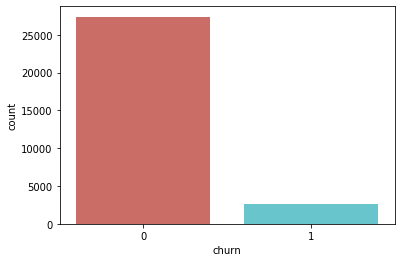

In [183]:
sns.countplot(x=telecom_first['churn'],data=telecom_first, palette='hls')
print (telecom_first['churn'].sum())

In [184]:
print (telecom_final.shape)

(29979, 81)


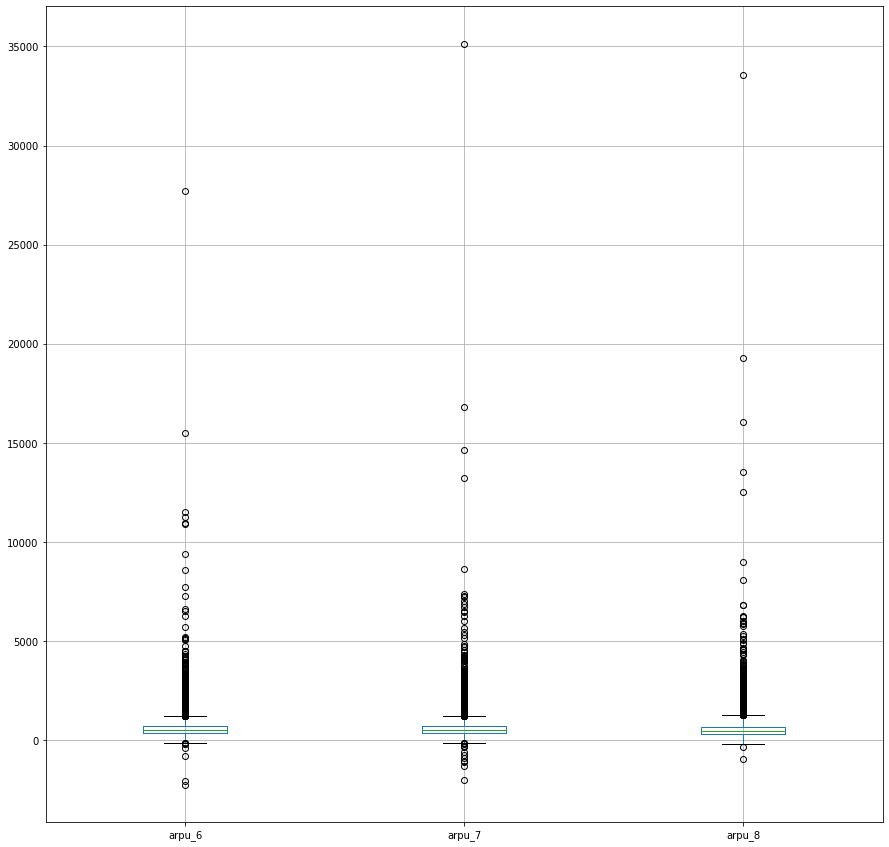

In [185]:
fig, ax = plt.subplots(figsize=(15,  15))
telecom_first.boxplot(['arpu_6', 'arpu_7', 'arpu_8'])

In [186]:
telecom_final = telecom_final[telecom_final['arpu_6'] < 10000]
telecom_final = telecom_final[telecom_final['arpu_7'] < 10000]
telecom_final = telecom_final[telecom_final['arpu_8'] < 10000]
telecom_final.shape

(29971, 81)

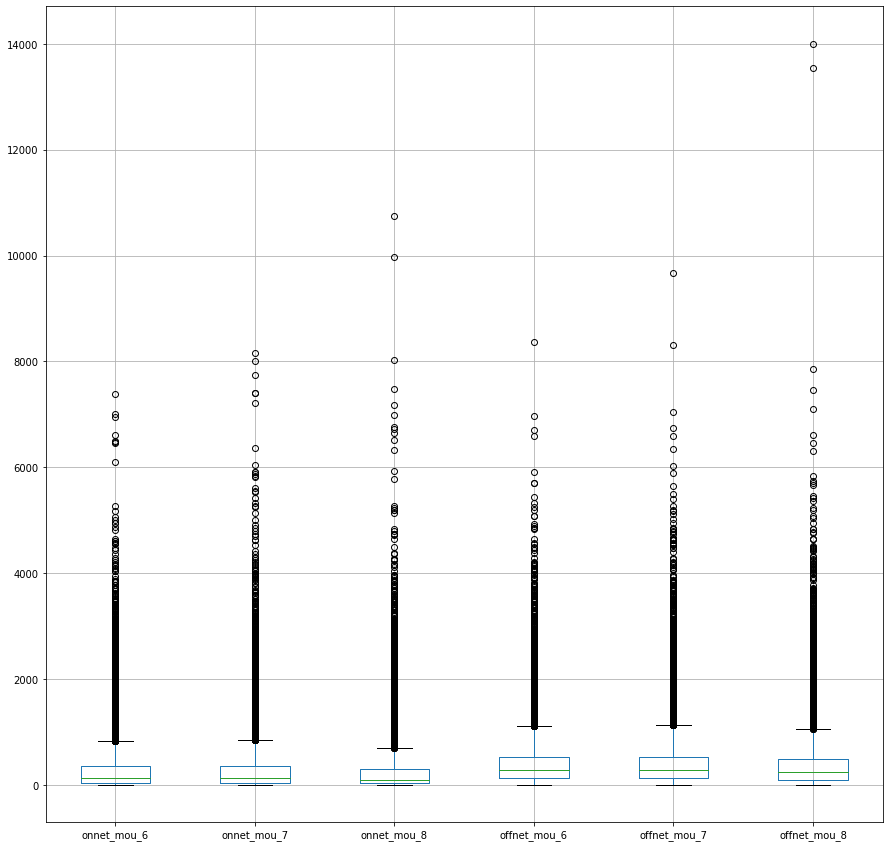

In [187]:
fig, ax = plt.subplots(figsize=(15,  15))
telecom_first.boxplot(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8','offnet_mou_6','offnet_mou_7','offnet_mou_8'])


In [188]:
telecom_final = telecom_final[telecom_final['onnet_mou_6'] < 6000]
telecom_final = telecom_final[telecom_final['onnet_mou_7'] < 6000]
telecom_final = telecom_final[telecom_final['onnet_mou_8'] < 6000]
telecom_final = telecom_final[telecom_final['offnet_mou_6'] < 6000]
telecom_final = telecom_final[telecom_final['onnet_mou_7'] < 6000]
telecom_final = telecom_final[telecom_final['onnet_mou_8'] < 6000]
telecom_final.shape

(29949, 81)

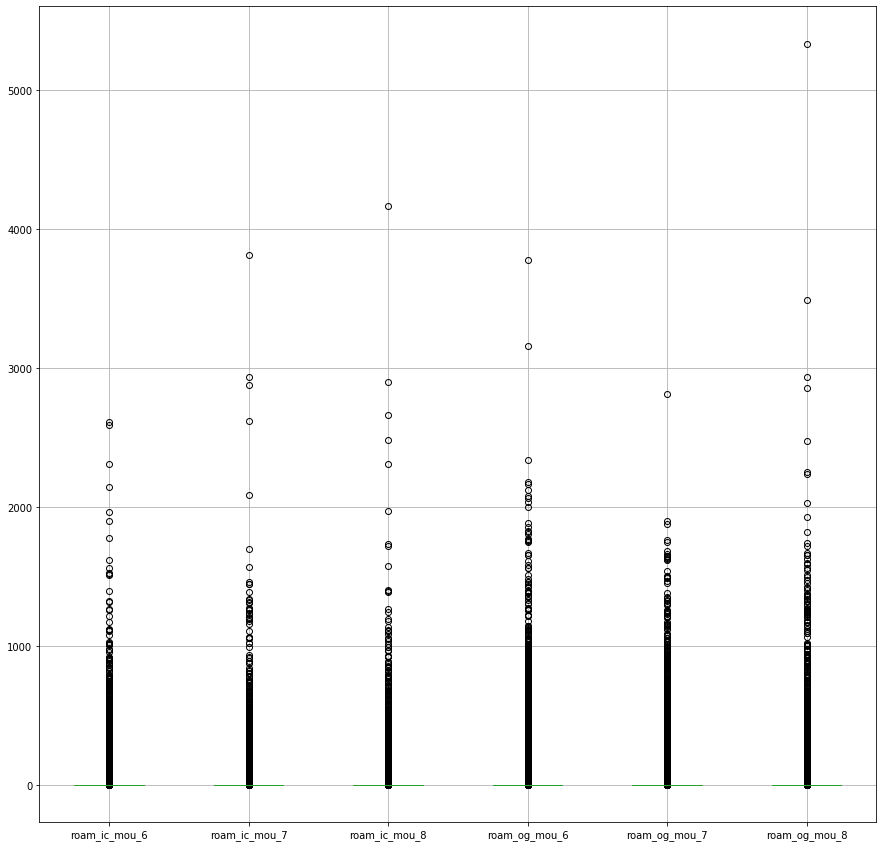

In [189]:
fig, ax = plt.subplots(figsize=(15,  15))
telecom_first.boxplot(['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8','roam_og_mou_6','roam_og_mou_7','roam_og_mou_8'])


In [190]:
telecom_final = telecom_final[telecom_final['roam_ic_mou_6'] < 2200]
telecom_final = telecom_final[telecom_final['roam_ic_mou_7'] < 2200]
telecom_final = telecom_final[telecom_final['roam_ic_mou_8'] < 2200]
telecom_final = telecom_final[telecom_final['roam_og_mou_6'] < 2200]
telecom_final = telecom_final[telecom_final['roam_og_mou_7'] < 2200]
telecom_final = telecom_final[telecom_final['roam_og_mou_8'] < 2200]
telecom_final.shape

(29932, 81)

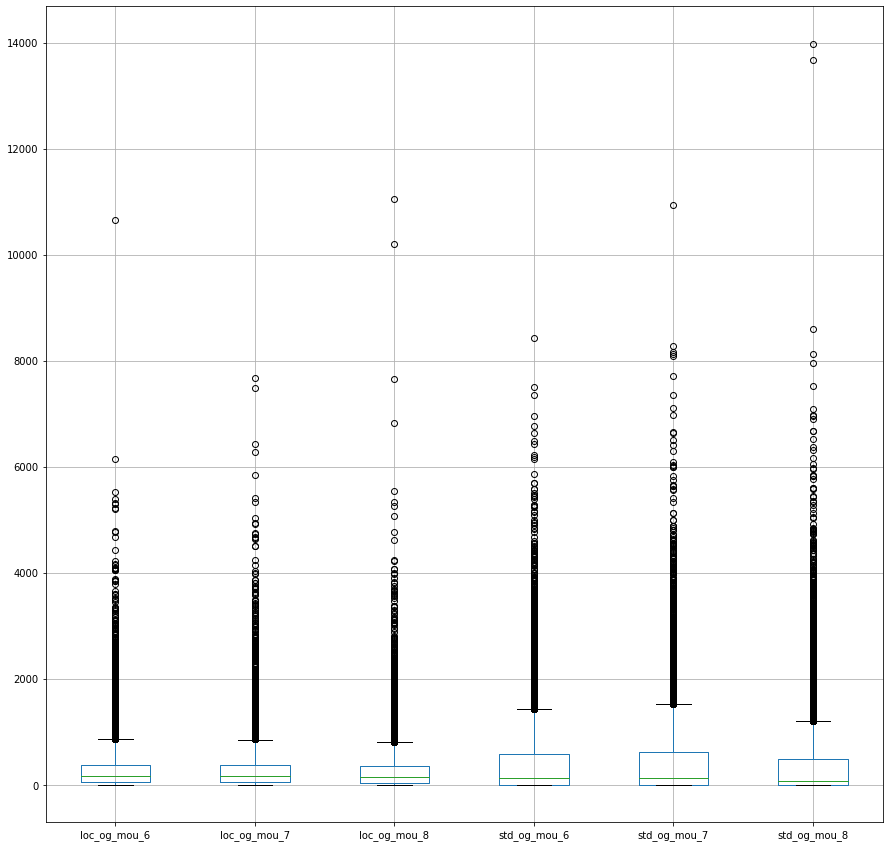

In [191]:
fig, ax = plt.subplots(figsize=(15,  15))
telecom_first.boxplot(['loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8','std_og_mou_6','std_og_mou_7','std_og_mou_8'])


In [192]:
telecom_final = telecom_final[telecom_final['loc_og_mou_6'] < 7000]
telecom_final = telecom_final[telecom_final['loc_og_mou_7'] < 7000]
telecom_final = telecom_final[telecom_final['loc_og_mou_8'] < 7000]
telecom_final = telecom_final[telecom_final['std_og_mou_6'] < 7000]
telecom_final = telecom_final[telecom_final['std_og_mou_7'] < 7000]
telecom_final = telecom_final[telecom_final['std_og_mou_8'] < 7000]
telecom_final.shape

(29927, 81)

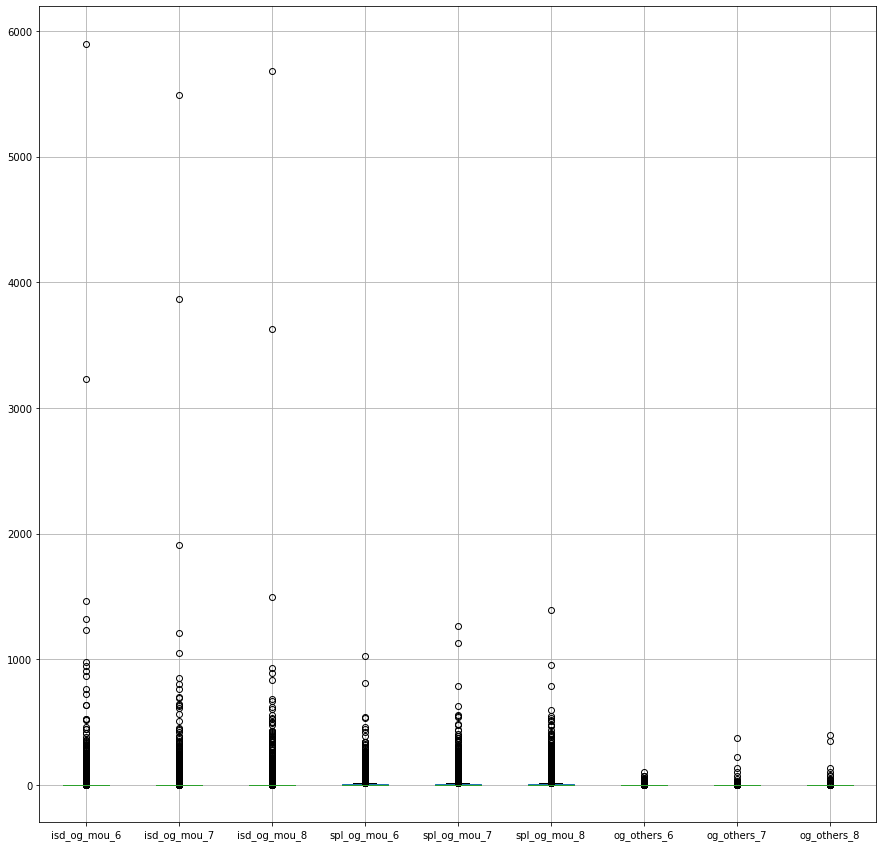

In [193]:
fig, ax = plt.subplots(figsize=(15,  15))
telecom_first.boxplot(['isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8','spl_og_mou_6','spl_og_mou_7','spl_og_mou_8',
                      'og_others_6','og_others_7','og_others_8'])

In [194]:
telecom_final = telecom_final[telecom_final['isd_og_mou_6'] < 1000]
telecom_final = telecom_final[telecom_final['isd_og_mou_7'] < 1000]
telecom_final = telecom_final[telecom_final['isd_og_mou_8'] < 1000]
telecom_final = telecom_final[telecom_final['spl_og_mou_6'] < 1000]
telecom_final = telecom_final[telecom_final['spl_og_mou_7'] < 1000]
telecom_final = telecom_final[telecom_final['spl_og_mou_8'] < 1000]
telecom_final = telecom_final[telecom_final['og_others_6'] < 1000]
telecom_final = telecom_final[telecom_final['og_others_7'] < 1000]
telecom_final = telecom_final[telecom_final['og_others_8'] < 1000]
telecom_final.shape

(29924, 81)

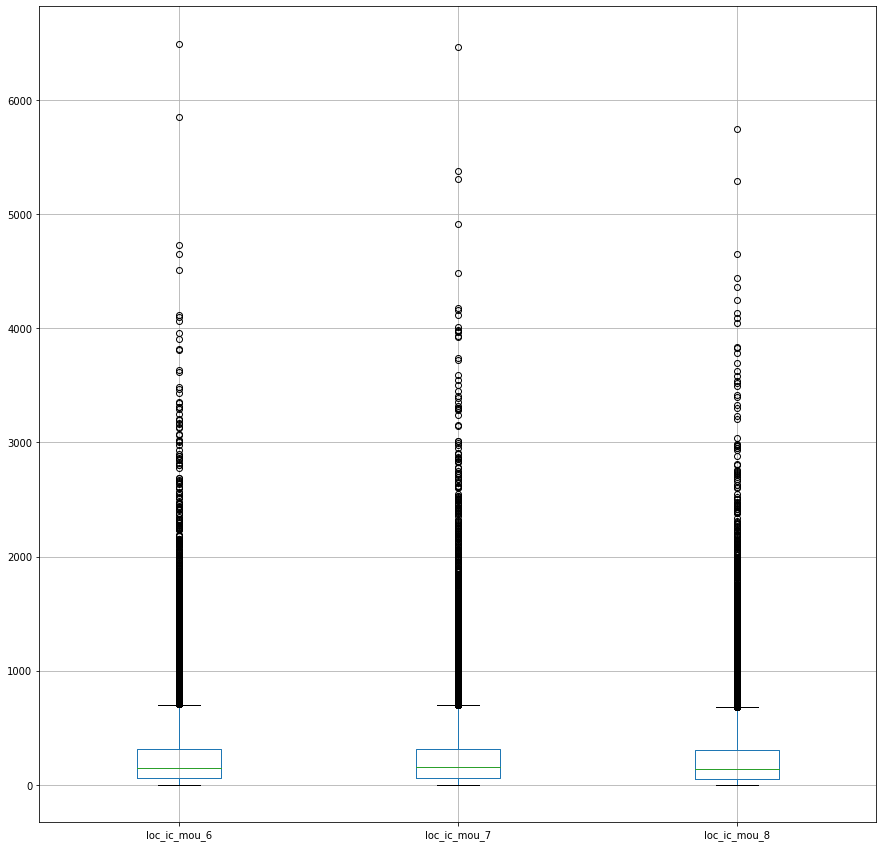

In [195]:
fig, ax = plt.subplots(figsize=(15,  15))
telecom_first.boxplot(['loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8'])

In [196]:
telecom_final = telecom_final[telecom_final['loc_ic_mou_6'] < 5000]
telecom_final = telecom_final[telecom_final['loc_ic_mou_7'] < 5000]
telecom_final = telecom_final[telecom_final['loc_ic_mou_8'] < 5000]
telecom_final.shape

(29918, 81)

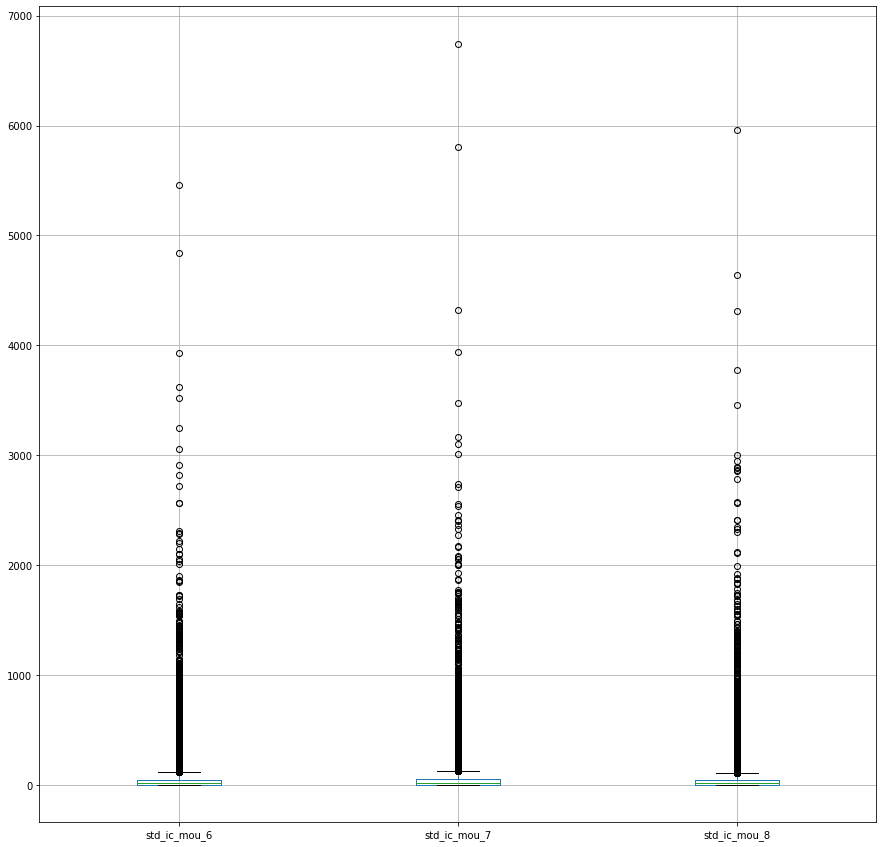

In [197]:
fig, ax = plt.subplots(figsize=(15,  15))
telecom_first.boxplot(['std_ic_mou_6','std_ic_mou_7','std_ic_mou_8'])

In [198]:
telecom_final = telecom_final[telecom_final['std_ic_mou_6'] < 3000]
telecom_final = telecom_final[telecom_final['std_ic_mou_7'] < 3000]
telecom_final = telecom_final[telecom_final['std_ic_mou_8'] < 3000]
telecom_final.shape

(29902, 81)

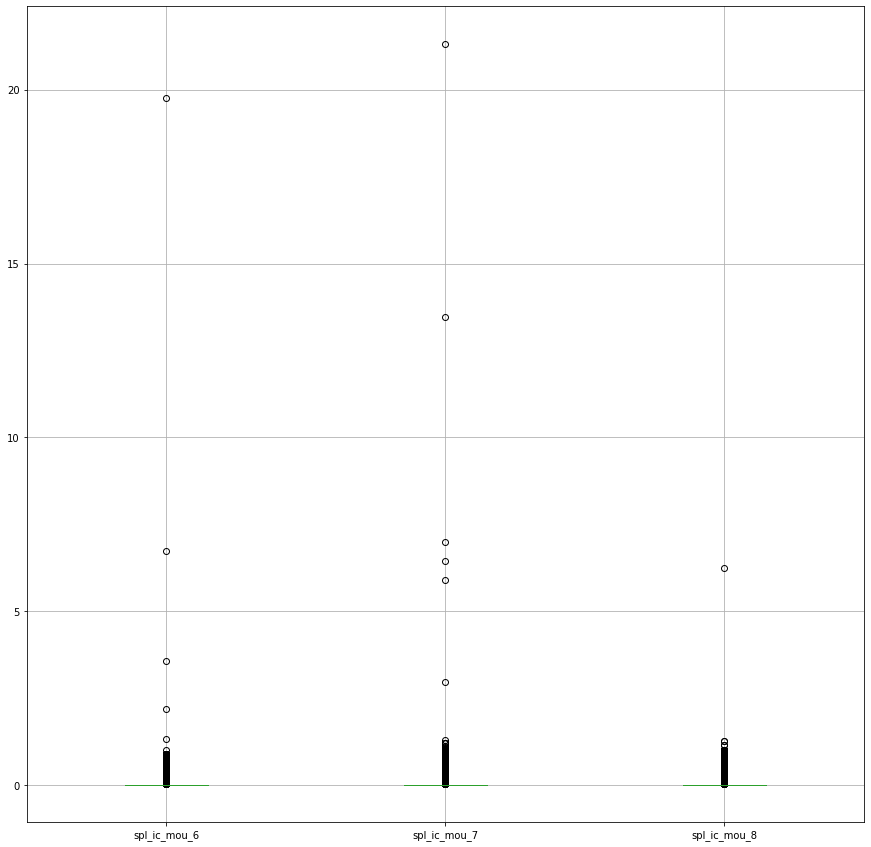

In [199]:
fig, ax = plt.subplots(figsize=(15,  15))
telecom_first.boxplot(['spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8'])

In [200]:
telecom_final = telecom_final[telecom_final['spl_ic_mou_6'] < 5]
telecom_final = telecom_final[telecom_final['spl_ic_mou_7'] < 5]
telecom_final = telecom_final[telecom_final['spl_ic_mou_8'] < 5]
telecom_final.shape

(29895, 81)

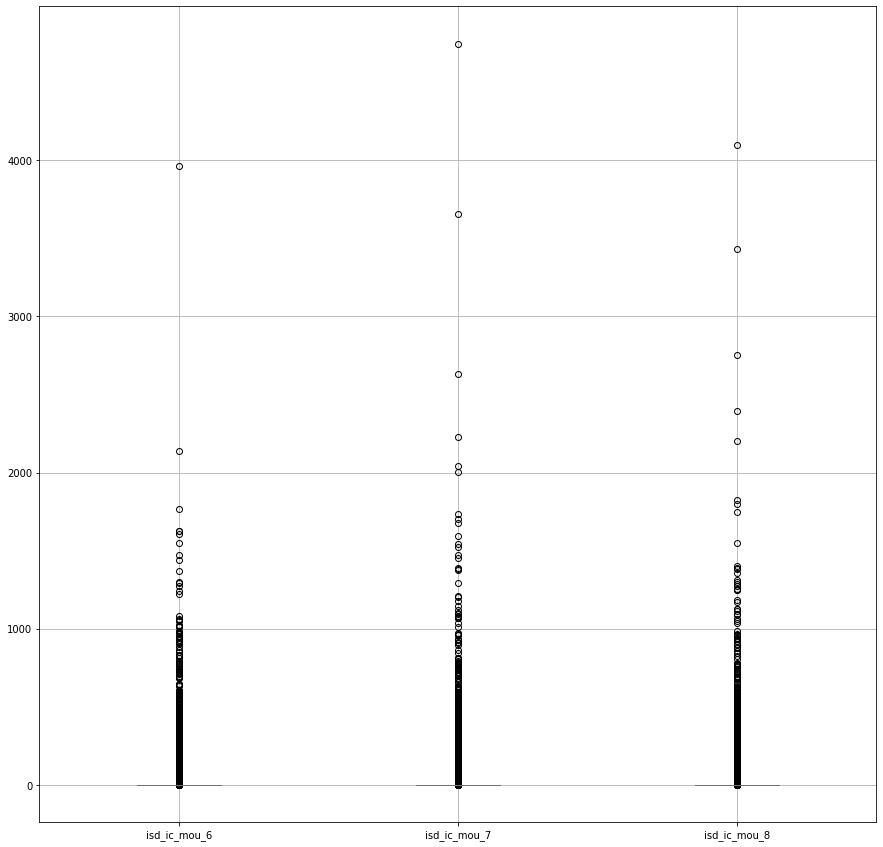

In [201]:
fig, ax = plt.subplots(figsize=(15,  15))
telecom_first.boxplot(['isd_ic_mou_6','isd_ic_mou_7','isd_ic_mou_8'])

In [202]:
telecom_final = telecom_final[telecom_final['isd_ic_mou_6'] < 2000]
telecom_final = telecom_final[telecom_final['isd_ic_mou_7'] < 2000]
telecom_final = telecom_final[telecom_final['isd_ic_mou_8'] < 2000]
telecom_final.shape

(29884, 81)

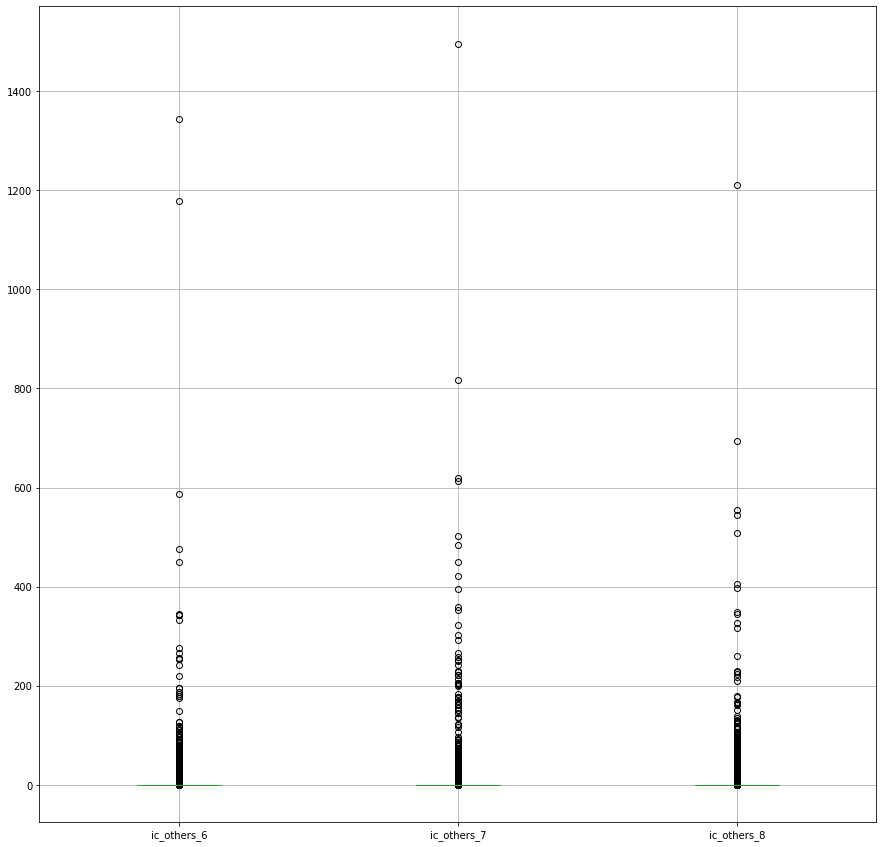

In [203]:
fig, ax = plt.subplots(figsize=(15,  15))
telecom_first.boxplot(['ic_others_6','ic_others_7','ic_others_8'])

In [204]:
telecom_final = telecom_final[telecom_final['ic_others_6'] < 600]
telecom_final = telecom_final[telecom_final['ic_others_7'] < 600]
telecom_final = telecom_final[telecom_final['ic_others_7'] < 600]
telecom_final.shape

(29880, 81)

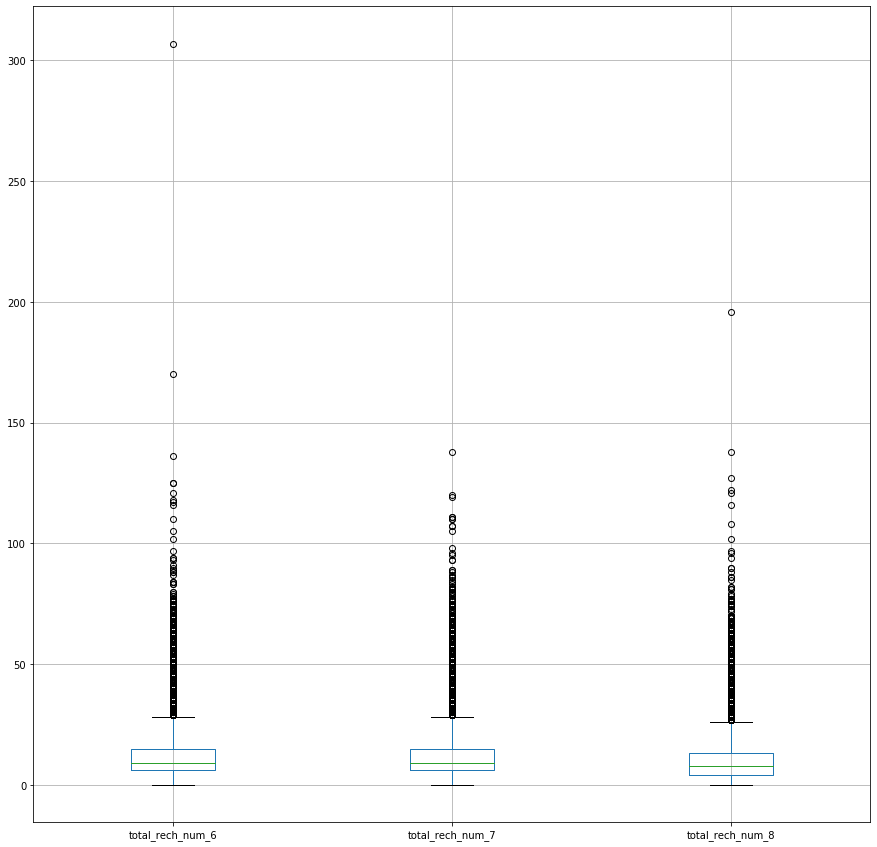

In [205]:
fig, ax = plt.subplots(figsize=(15,  15))
telecom_first.boxplot(['total_rech_num_6','total_rech_num_7','total_rech_num_8'])

In [206]:
telecom_final = telecom_final[telecom_final['total_rech_num_6'] < 135]
telecom_final = telecom_final[telecom_final['total_rech_num_7'] < 135]
telecom_final = telecom_final[telecom_final['total_rech_num_8'] < 135]
telecom_final.shape

(29874, 81)

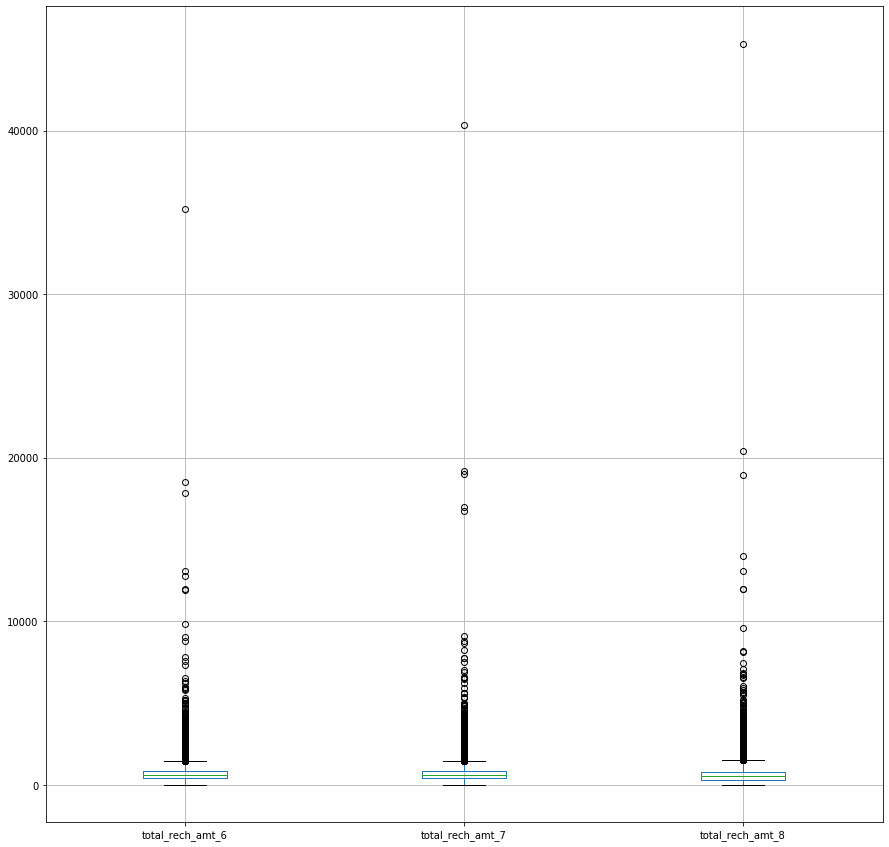

In [207]:
fig, ax = plt.subplots(figsize=(15,  15))
telecom_first.boxplot(['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8'])

In [208]:
telecom_final = telecom_final[telecom_final['total_rech_amt_6'] < 10000]
telecom_final = telecom_final[telecom_final['total_rech_amt_7'] < 10000]
telecom_final = telecom_final[telecom_final['total_rech_amt_8'] < 10000]
telecom_final.shape

(29871, 81)

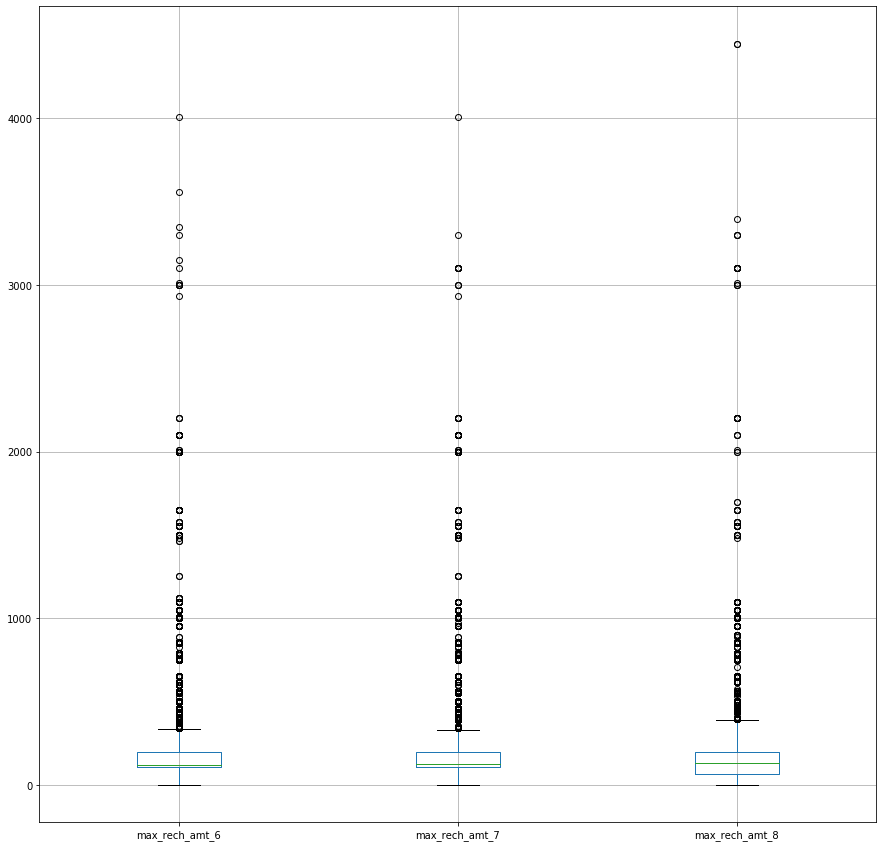

In [209]:
fig, ax = plt.subplots(figsize=(15,  15))
telecom_first.boxplot(['max_rech_amt_6','max_rech_amt_7','max_rech_amt_8'])

In [210]:
telecom_final = telecom_final[telecom_final['max_rech_amt_6'] < 2000]
telecom_final = telecom_final[telecom_final['max_rech_amt_7'] < 2000]
telecom_final = telecom_final[telecom_final['max_rech_amt_8'] < 2000]
telecom_final.shape

(29787, 81)

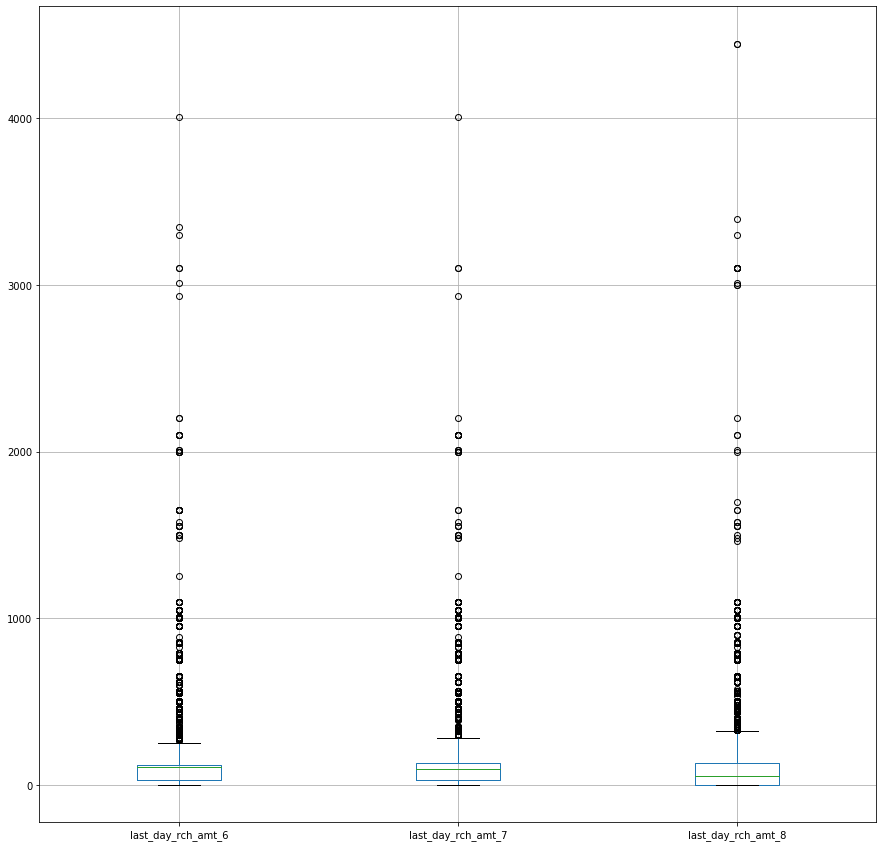

In [211]:
fig, ax = plt.subplots(figsize=(15,  15))
telecom_first.boxplot(['last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8'])

In [212]:
telecom_final = telecom_final[telecom_final['last_day_rch_amt_6'] < 2000]
telecom_final = telecom_final[telecom_final['last_day_rch_amt_7'] < 2000]
telecom_final = telecom_final[telecom_final['last_day_rch_amt_8'] < 2000]
telecom_final.shape

(29787, 81)

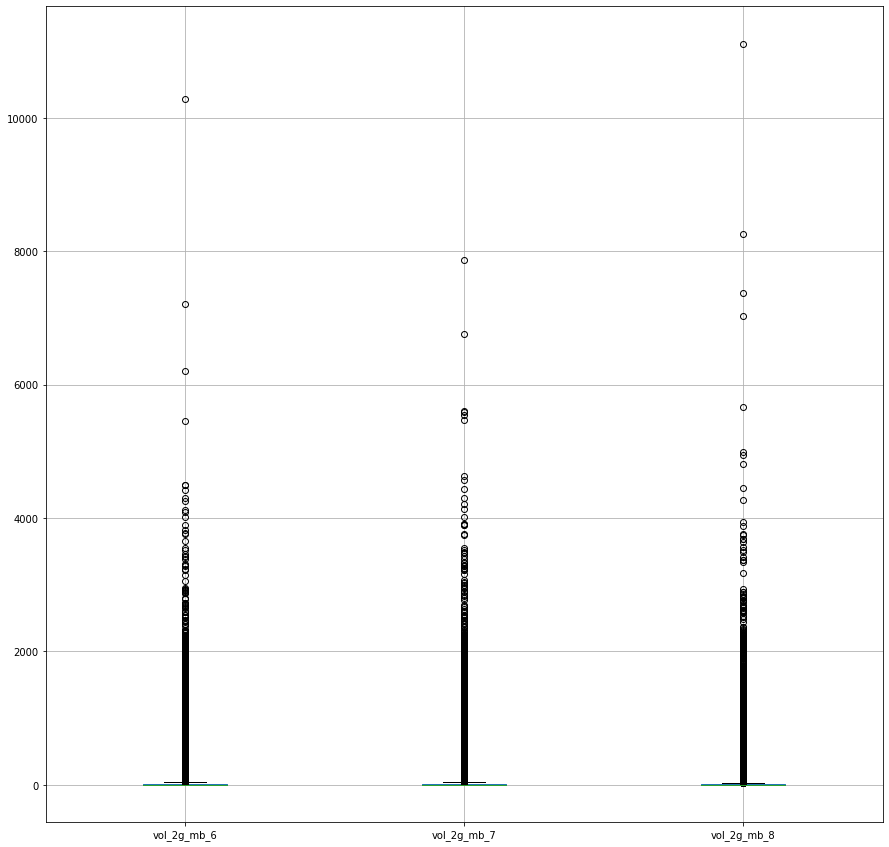

In [213]:
fig, ax = plt.subplots(figsize=(15,  15))
telecom_first.boxplot(['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8'])

In [214]:
telecom_final = telecom_final[telecom_final['vol_2g_mb_6'] < 6000]
telecom_final = telecom_final[telecom_final['vol_2g_mb_7'] < 6000]
telecom_final = telecom_final[telecom_final['vol_2g_mb_8'] < 6000]
telecom_final.shape

(29781, 81)

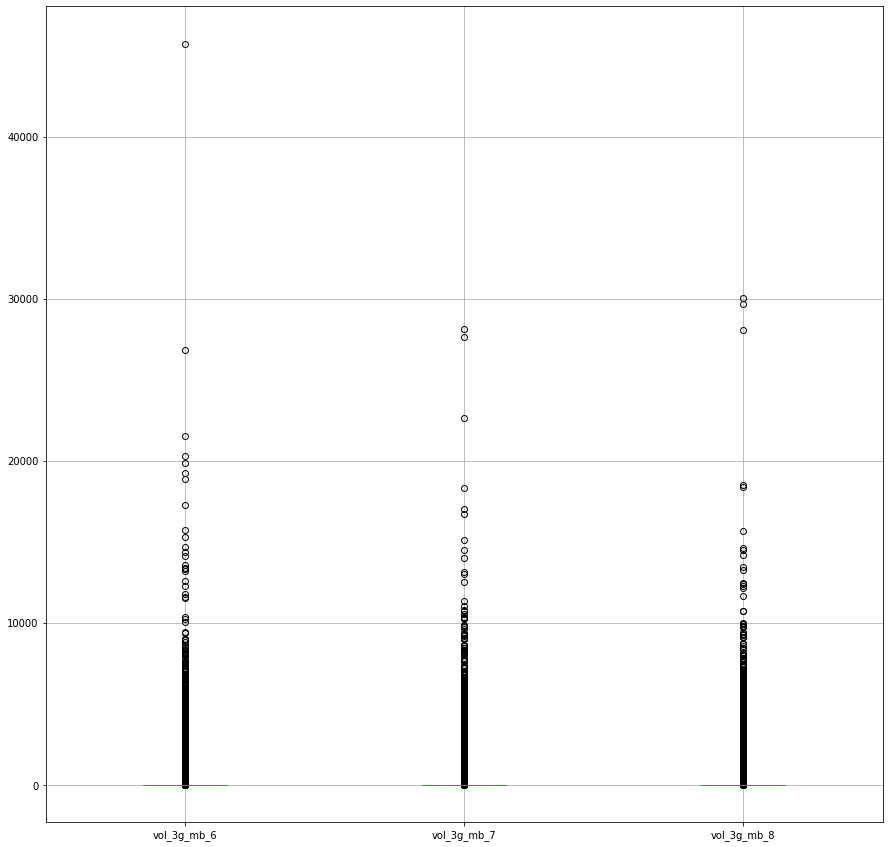

In [215]:
fig, ax = plt.subplots(figsize=(15,  15))
telecom_first.boxplot(['vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8'])

In [216]:
telecom_final = telecom_final[telecom_final['vol_3g_mb_6'] < 20000]
telecom_final = telecom_final[telecom_final['vol_3g_mb_7'] < 20000]
telecom_final = telecom_final[telecom_final['vol_3g_mb_8'] < 20000]
telecom_final.shape

(29776, 81)

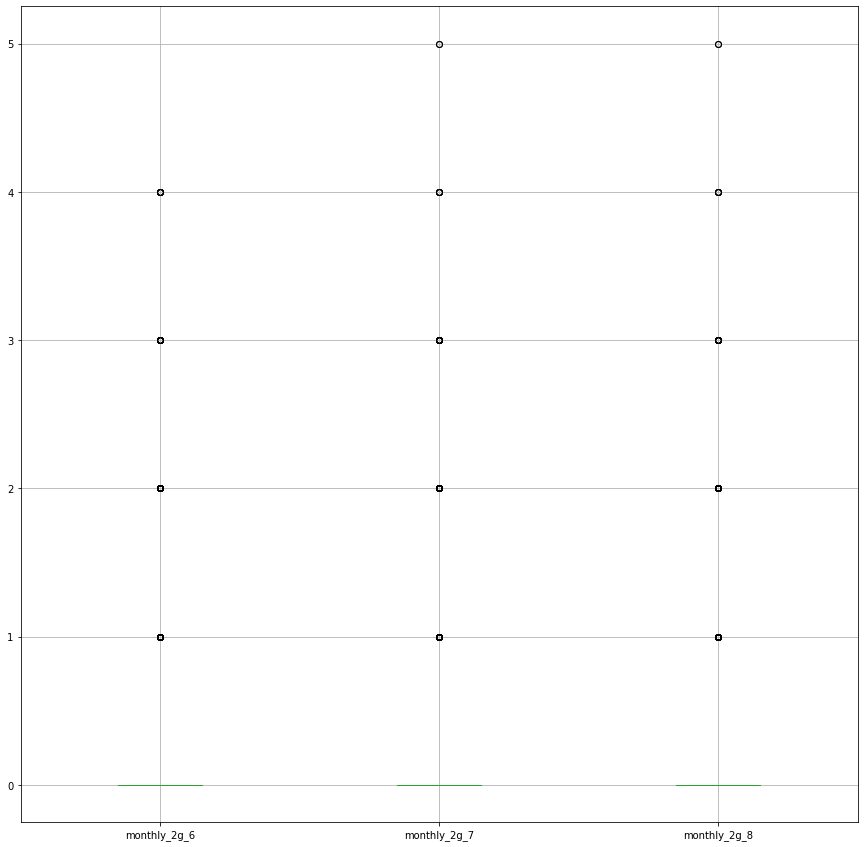

In [217]:
fig, ax = plt.subplots(figsize=(15,  15))
telecom_first.boxplot(['monthly_2g_6','monthly_2g_7','monthly_2g_8'])

In [218]:
telecom_final = telecom_final[telecom_final['monthly_2g_6'] < 6]
telecom_final = telecom_final[telecom_final['monthly_2g_7'] < 6]
telecom_final = telecom_final[telecom_final['monthly_2g_8'] < 6]
telecom_final.shape

(29776, 81)

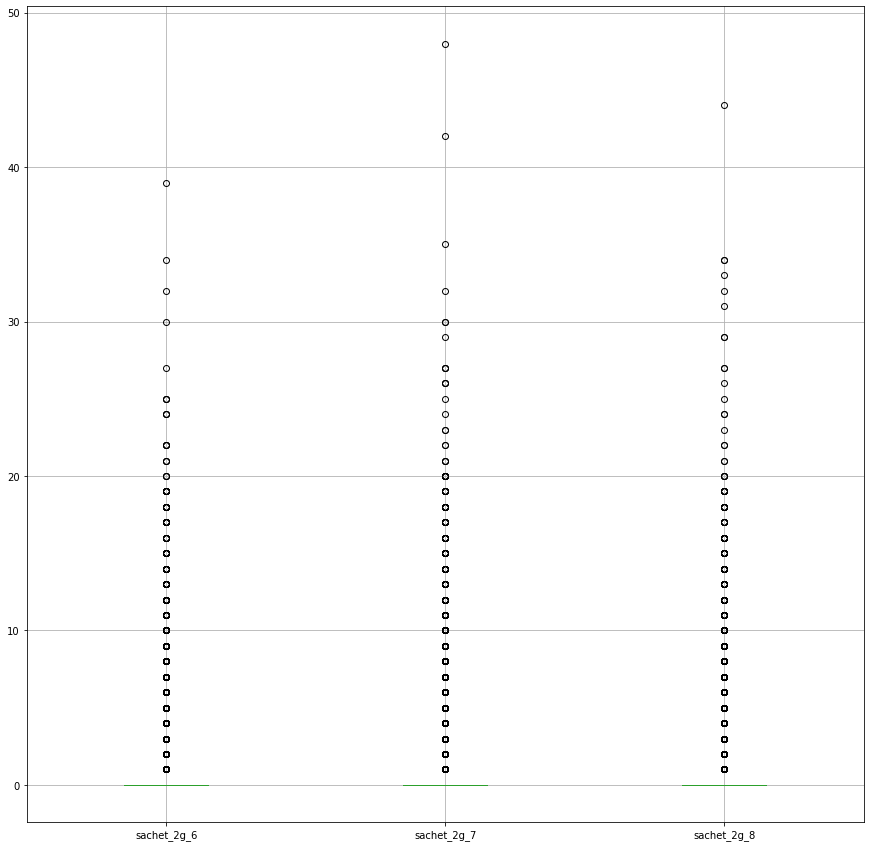

In [219]:
fig, ax = plt.subplots(figsize=(15,  15))
telecom_first.boxplot(['sachet_2g_6','sachet_2g_7','sachet_2g_8'])

In [220]:
telecom_final = telecom_final[telecom_final['sachet_2g_6'] < 50]
telecom_final = telecom_final[telecom_final['sachet_2g_7'] < 50]
telecom_final = telecom_final[telecom_final['sachet_2g_8'] < 50]
telecom_final.shape

(29776, 81)

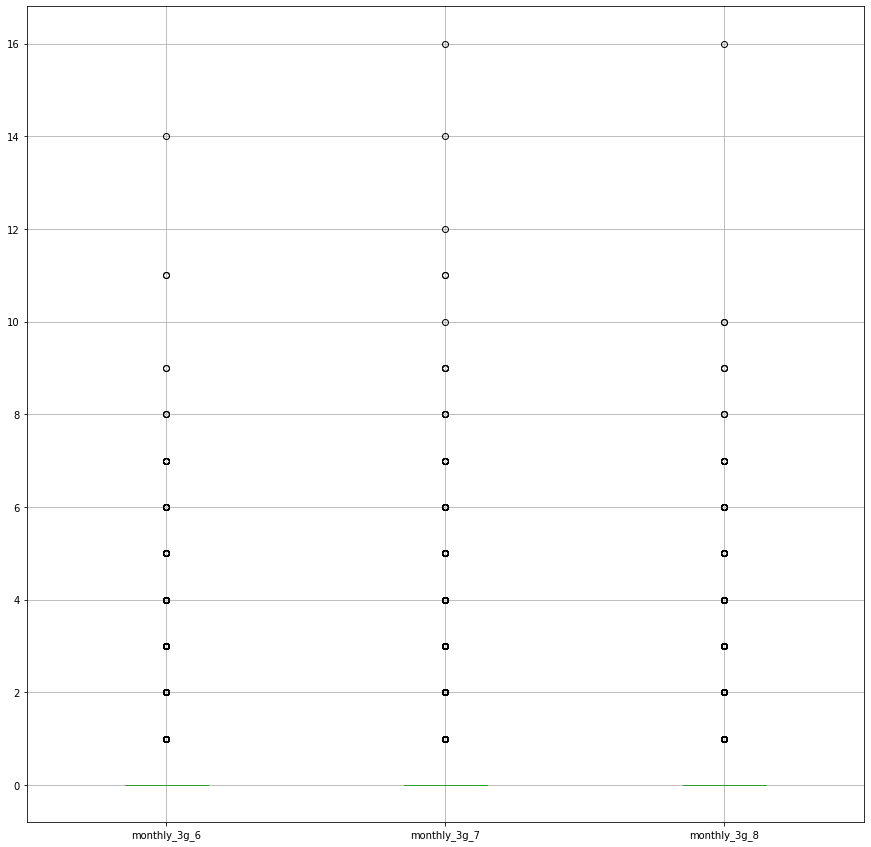

In [221]:
fig, ax = plt.subplots(figsize=(15,  15))
telecom_first.boxplot(['monthly_3g_6','monthly_3g_7','monthly_3g_8'])

In [222]:
telecom_final = telecom_final[telecom_final['monthly_3g_6'] < 16]
telecom_final = telecom_final[telecom_final['monthly_3g_7'] < 16]
telecom_final = telecom_final[telecom_final['monthly_3g_8'] < 16]
telecom_final.shape

(29775, 81)

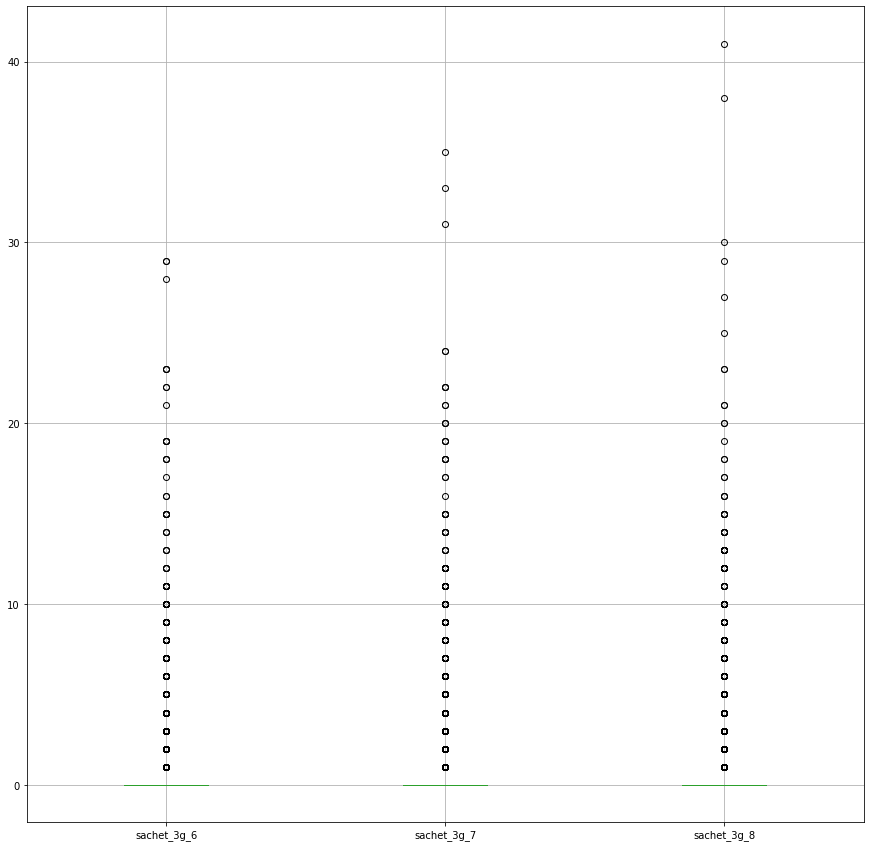

In [223]:
fig, ax = plt.subplots(figsize=(15,  15))
telecom_first.boxplot(['sachet_3g_6','sachet_3g_7','sachet_3g_8'])

In [224]:
telecom_final = telecom_final[telecom_final['sachet_3g_6'] < 40]
telecom_final = telecom_final[telecom_final['sachet_3g_7'] < 40]
telecom_final = telecom_final[telecom_final['sachet_3g_8'] < 40]
telecom_final.shape

(29774, 81)

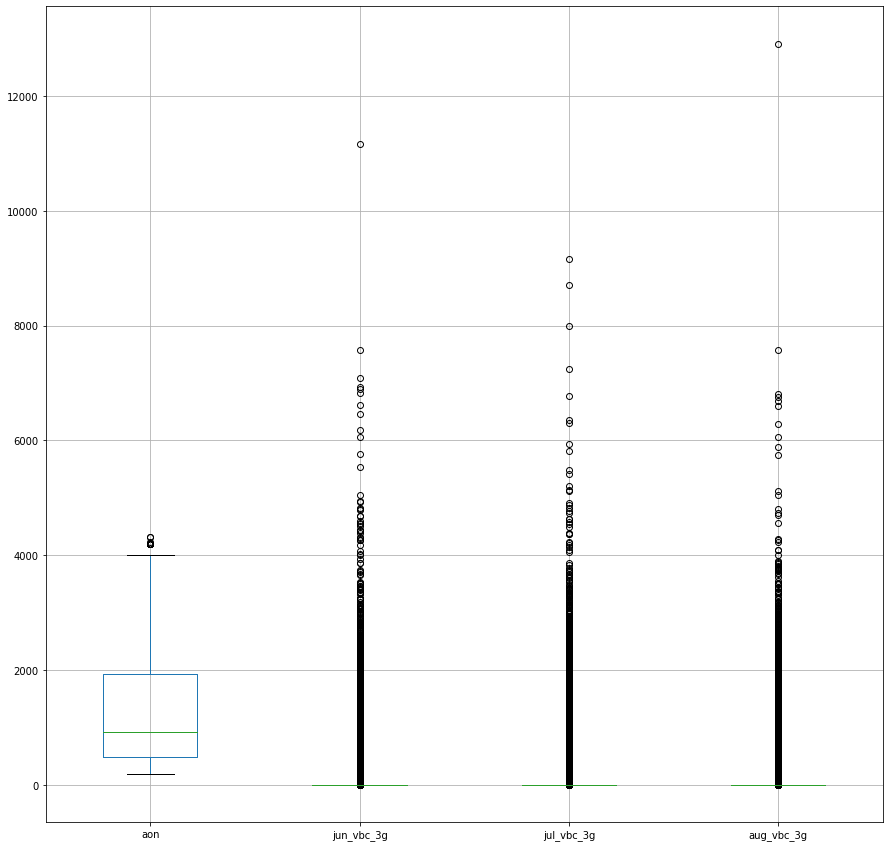

In [225]:
fig, ax = plt.subplots(figsize=(15,  15))
telecom_first.boxplot(['aon','jun_vbc_3g','jul_vbc_3g','aug_vbc_3g']) 

In [226]:
telecom_final = telecom_final[telecom_final['jun_vbc_3g'] < 8000]
telecom_final = telecom_final[telecom_final['jul_vbc_3g'] < 8000]
telecom_final = telecom_final[telecom_final['aug_vbc_3g'] < 8000]
telecom_final.shape

(29770, 81)

# EDA

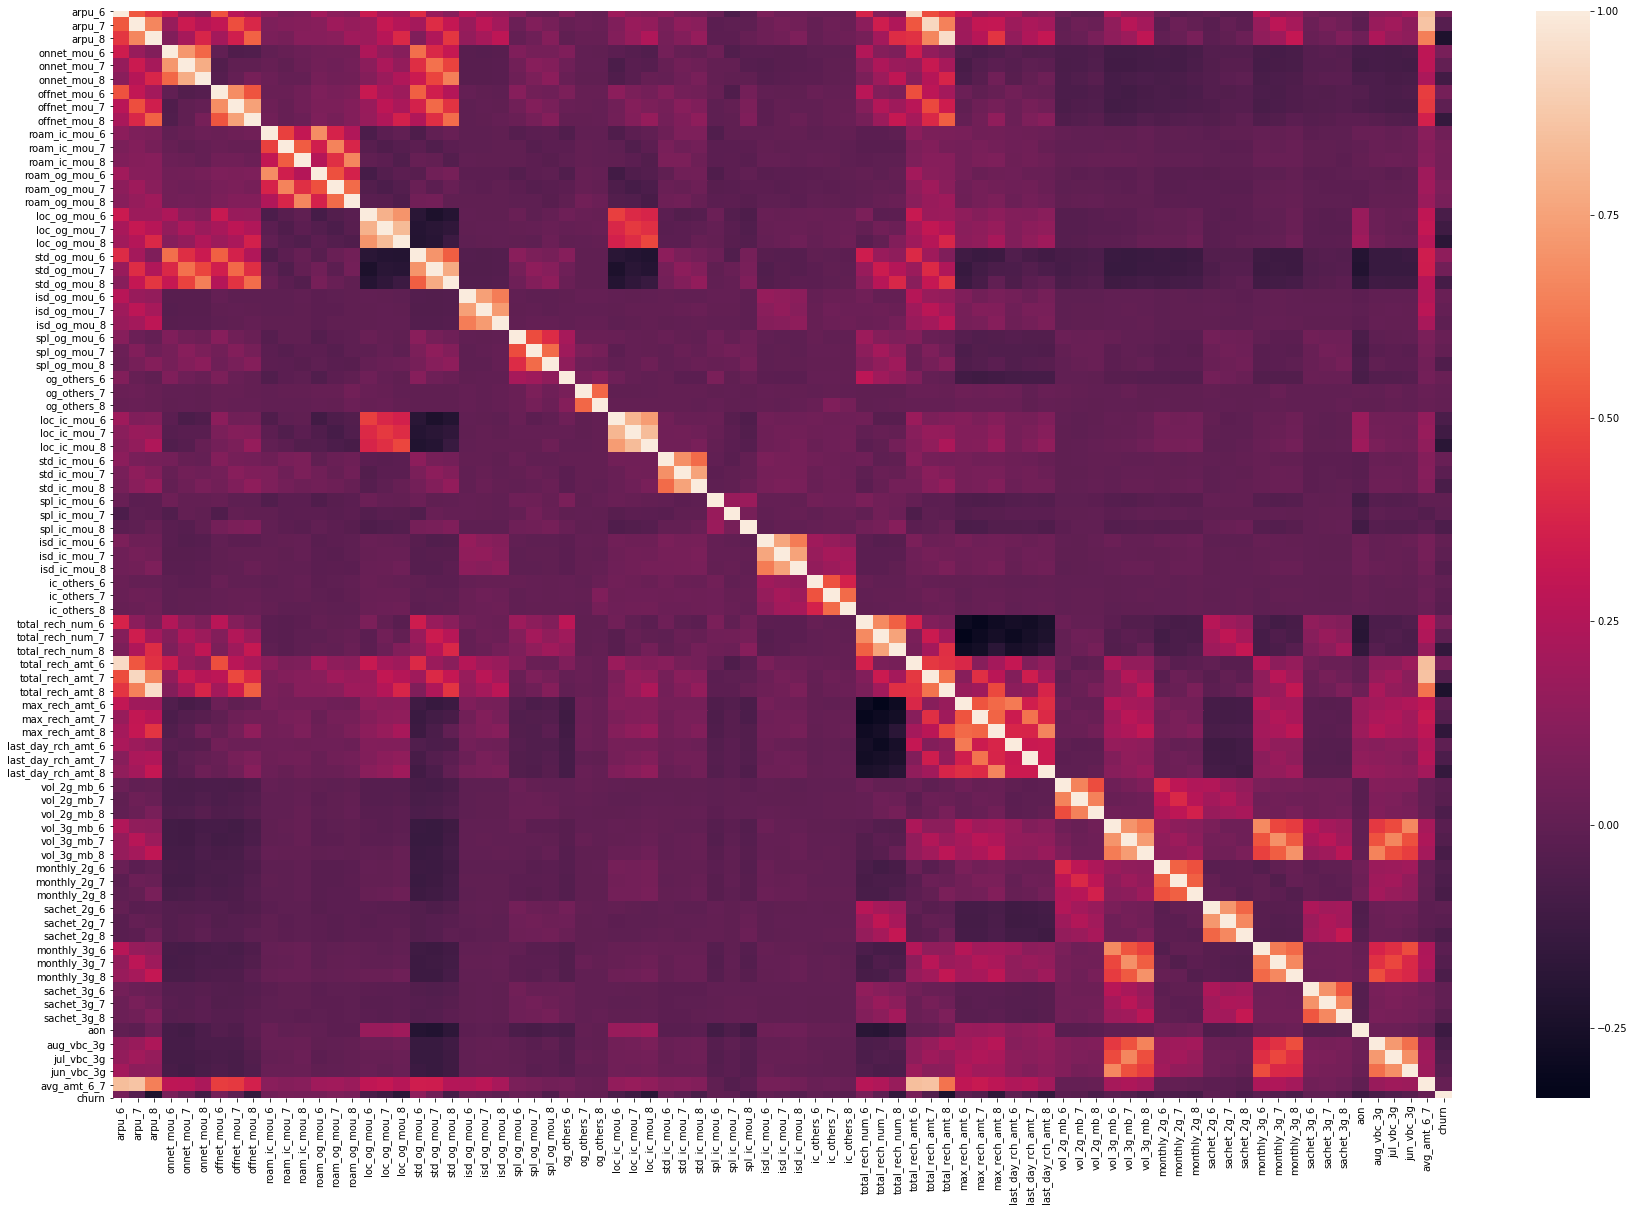

In [227]:
plt.figure(figsize=(30,20))

sns.heatmap(telecom_final.corr(), annot = False)

In [228]:
corr = telecom_final.corr()
c = corr.abs()
s = c.unstack()
so = s.sort_values(kind="quicksort")
print (len(so))
so[6450:6481]

6561


isd_ic_mou_7      isd_ic_mou_8        0.754198
isd_ic_mou_8      isd_ic_mou_7        0.754198
isd_ic_mou_7      isd_ic_mou_6        0.761205
isd_ic_mou_6      isd_ic_mou_7        0.761205
std_og_mou_8      std_og_mou_7        0.777718
std_og_mou_7      std_og_mou_8        0.777718
onnet_mou_8       onnet_mou_7         0.784623
onnet_mou_7       onnet_mou_8         0.784623
loc_og_mou_7      loc_og_mou_6        0.798151
loc_og_mou_6      loc_og_mou_7        0.798151
loc_ic_mou_6      loc_ic_mou_7        0.813077
loc_ic_mou_7      loc_ic_mou_6        0.813077
loc_og_mou_7      loc_og_mou_8        0.831110
loc_og_mou_8      loc_og_mou_7        0.831110
loc_ic_mou_7      loc_ic_mou_8        0.835014
loc_ic_mou_8      loc_ic_mou_7        0.835014
arpu_6            avg_amt_6_7         0.842128
avg_amt_6_7       arpu_6              0.842128
                  total_rech_amt_6    0.845758
total_rech_amt_6  avg_amt_6_7         0.845758
total_rech_amt_7  avg_amt_6_7         0.854771
avg_amt_6_7  

# Modelling

In [229]:
telecom_final.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_amt_6_7,churn
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,422.16,533.91,255.79,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,427.88,355.23,188.04,180.54,173.08,193.94,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,1185.0,1
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,378.09,288.18,63.04,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,81.43,23.83,15.79,22.43,4.66,0.75,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,205.31,53.48,353.99,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,215.58,26.11,255.26,423.81,68.09,474.41,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0
16,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,315.91,215.64,205.93,30.89,67.09,21.53,0.0,0.00,0.00,0.00,3.26,5.91,0.00,0.0,0.0,276.86,229.83,211.78,87.99,151.73,82.44,0.00,0.0,0.0,0.00,0.00,0.23,0.00,0.00,0.00,10,6,2,570,348,160,110,110,130,100,100,130,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,511,0.00,2.45,21.89,459.0,0
17,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,5.54,0.00,4.76,4.81,0.00,8.46,13.34,97.54,0.00,0.00,1148.46,0.81,0.00,0.0,0.00,0.00,2.58,0.00,0.00,0.93,0.0,0.0,81.96,2.31,0.00,9.91,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,2,4,816,0,30,110,0,30,30,0,0,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,667,0.00,0.00,0.00,408.0,0


In [230]:
telecom_final.dtypes

arpu_6                float64
arpu_7                float64
arpu_8                float64
onnet_mou_6           float64
onnet_mou_7           float64
onnet_mou_8           float64
offnet_mou_6          float64
offnet_mou_7          float64
offnet_mou_8          float64
roam_ic_mou_6         float64
roam_ic_mou_7         float64
roam_ic_mou_8         float64
roam_og_mou_6         float64
roam_og_mou_7         float64
roam_og_mou_8         float64
loc_og_mou_6          float64
loc_og_mou_7          float64
loc_og_mou_8          float64
std_og_mou_6          float64
std_og_mou_7          float64
std_og_mou_8          float64
isd_og_mou_6          float64
isd_og_mou_7          float64
isd_og_mou_8          float64
spl_og_mou_6          float64
spl_og_mou_7          float64
spl_og_mou_8          float64
og_others_6           float64
og_others_7           float64
og_others_8           float64
loc_ic_mou_6          float64
loc_ic_mou_7          float64
loc_ic_mou_8          float64
std_ic_mou

In [231]:
telecom_final.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_amt_6_7,churn
count,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000,29770.000000
mean,579.713180,580.137412,525.199879,293.514601,300.742864,263.310848,415.294276,421.002966,371.320315,16.941647,13.052445,12.528275,28.725507,21.490210,20.467597,281.775918,282.746499,259.221313,392.033758,411.351856,349.124206,1.668857,1.586610,1.495464,5.847031,7.305260,6.798235,0.692448,0.047609,0.059198,243.302422,246.852861,233.571315,49.610000,51.655923,46.684172,0.065818,0.016265,0.027444,10.616203,11.446274,10.828698,1.097683,1.334546,1.159332,12.089318,11.887235,10.194390,686.272321,684.534599,602.844273,167.617534,171.428284,159.703863,102.261303,103.572220,93.712026,77.991546,76.669031,67.596710,252.113488,272.493779,264.820942,0.124958,0.131508,0.113873,0.500403,0.586765,0.605643,0.172758,0.183171,0.172355,0.137387,0.148808,0.138193,1264.974068,127.972539,133.574627,120.187009,685.403460,0.085925
std,363.345144,364.896237,395.521337,445.906360,459.751740,437.471516,458.037598,472.281372,451.950554,73.744568,67.458760,62.534620,112.656387,93.734196,92.962100,370.482023,364.339131,347.102907,591.456003,616.852631,588.021550,18.590960,17.415417,17.997720,17.359685,20.627105,21.192797,2.279176,2.752400,3.333451,307.020831,308.873518,301.677398,122.375854,127.345513,122.410781,0.151553,0.088323,0.110864,59.125536,61.202261,59.635200,9.464144,10.457656,10.269242,9.271121,9.499194,9.318676,431.726311,443.838761,476.462697,150.741806,155.301400,147.891851,124.639774,127.067858,124.457997,265.455472,266.514131,246.386769,773.322415,792.402697,788.539487,0.374053,0.387246,0.356244,1.700732,1.893272,1.823774,0.570252,0.608211,0.574774,0.867756,0.949722,0.931052,975.345797,378.297254,396.225173,380.722754,372.258423,0.280259
min,-810.661000,-897.035000,-345.129000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

## Feature Scaling

In [232]:
from sklearn.preprocessing import StandardScaler

In [233]:
X = telecom_final.drop('churn', axis = 1)
y = telecom_final['churn']
y = y.values.reshape(-1,1)
print (X.shape)
print (y.shape)

(29770, 80)
(29770, 1)


In [234]:
col = X.columns
col

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6',
       'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_mou_6', 'loc_og_mou_7',
       'loc_og_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
       'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6',
       'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7',
       'og_others_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8',
       'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'spl_ic_mou_6',
       'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7',
       'isd_ic_mou_8', 'ic_others_6', 'ic_others_7', 'ic_others_8',
       'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'last_day_rch_amt_6', 

In [235]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns = col)
X

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_amt_6_7
0,1.347135,2.109437,6.690725,-0.528538,-0.535217,-0.482373,0.083260,0.309475,-0.100478,-0.009650,0.302969,0.305623,-0.044255,-0.094953,0.189246,0.378929,0.689379,-0.009886,-0.559939,-0.545053,-0.461359,-0.089769,-0.080769,0.473098,-0.077597,-0.354164,-0.014073,-0.303820,-0.017297,-0.017759,0.601199,0.350885,-0.150930,1.069919,0.953517,1.202985,0.951381,-0.184153,-0.247549,-0.144715,0.050387,0.348144,1.547162,1.324932,1.361435,-0.764680,-0.725046,-0.342800,2.070160,0.237625,6.370292,9.369705,3.983107,9.603775,-0.820469,-0.815107,5.506271,-0.293808,-0.287678,-0.274357,-0.326019,-0.343889,-0.335843,-0.33407,-0.339604,-0.319655,-0.294233,-0.309926,-0.332088,-0.302955,-0.301169,-0.299870,-0.158327,-0.156688,-0.148429,-0.474685,-0.185657,-0.288211,-0.266463,1.342092
1,-0.553181,-0.240934,-0.980590,0.269513,0.109381,-0.521713,-0.700029,-0.720712,-0.519624,-0.229738,-0.193491,-0.200345,-0.254988,-0.229271,-0.220175,0.259974,0.014914,-0.565206,-0.442600,-0.434263,-0.426597,-0.089769,-0.091105,-0.083093,-0.336822,-0.354164,0.161933,-0.303820,-0.017297,-0.017759,-0.527245,-0.722065,-0.721913,-0.222106,-0.369049,-0.375252,-0.434294,-0.184153,-0.247549,-0.179557,-0.187027,-0.181585,-0.115985,-0.127616,-0.112895,0.745411,0.959336,0.408392,-0.577395,-0.188212,-1.013411,-0.514912,-0.112224,-0.877033,-0.419306,-0.815107,-0.672624,-0.293808,1.048108,-0.274235,-0.326019,0.603815,-0.320701,-0.33407,2.242776,-0.319655,-0.294233,0.218269,1.312880,-0.302955,-0.301169,-0.299870,-0.158327,-0.156688,-0.148429,-0.974003,-0.282699,1.961229,0.005182,-0.447018
2,-0.239080,-1.026244,0.172080,0.467024,-0.418391,0.619317,-0.004332,-0.638873,0.245915,0.089342,1.944740,0.952796,-0.184152,0.146905,-0.204685,-0.206399,-0.629277,0.273032,0.523710,-0.441639,0.520493,-0.089769,-0.091105,-0.011416,-0.336822,-0.354164,-0.095234,-0.303820,-0.017297,-0.017759,-0.090296,-0.714683,0.071895,3.057844,0.129053,3.494243,2.535010,-0.184153,-0.247549,3.968974,0.827822,6.415133,8.704824,1.425339,1.974928,-0.656816,-0.830320,0.086453,-0.415252,-0.972294,0.239594,-0.382233,-0.395549,-0.200852,0.062090,-0.421610,-0.752974,-0.293808,-0.287678,-0.274275,-0.326019,-0.343889,-0.335843,-0.33407,-0.339604,-0.319655,-0.294233,-0.309926,1.312880,-0.302955,-0.301169,-0.299870,-0.158327,-0.156688,-0.148429,1.375972,-0.338291,-0.337124,-0.315686,-0.820421
3,-0.409365,-0.768090,-0.852828,-0.544977,-0.493172,-0.440495,-0.259818,-0.404984,-0.461475,-0.229738,-0.151539,-0.200345,-0.254988,-0.040010,-0.220175,0.092136,-0.184190,-0.153534,-0.610611,-0.558104,-0.557122,-0.089769,-0.091105,-0.083093,-0.336822,-0.196117,-0.041913,-0.303820,-0.017297,-0.017759,0.109302,-0.055114,-0.072235,0.313629,0.785860,0.292102,-0.434294,-0.184153,-0.247549,-0.179557,-0.187027,-0.177729,-0.115985,-0.127616,-0.112895,-0.225361,-0.619772,-0.879366,-0.269324,-0.758249,-0.929457,-0.382233,-0.395549,-0.200852,-0.018143,-0.028113,0.291573,-0.293808,-0.287678,-0.274357,-0.326019,-0.343889,-0.335843,-0.

In [236]:
len(y)

29770

In [237]:

from sklearn.model_selection import train_test_split

In [238]:
X_train, X_test, y_train, y_test = train_test_split(X, y , train_size = 0.7, test_size = 0.3, random_state = 101)

print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(20839, 80)
(8931, 80)
(20839, 1)
(8931, 1)


# Interpretable Model - without PCA

In [239]:

from sklearn.linear_model import LogisticRegression

In [240]:
lr = LogisticRegression()
model_1 = lr.fit(X_train, y_train)
pred_1 = model_1.predict(X_train)
pred_prob = model_1.predict_proba(X_train)

In [241]:
print (pred_1)
print ('\n')
print (pred_prob)

[0 0 0 ... 0 0 0]


[[7.97673689e-01 2.02326311e-01]
 [9.87456429e-01 1.25435707e-02]
 [8.11734530e-01 1.88265470e-01]
 ...
 [9.99537325e-01 4.62674725e-04]
 [9.76404778e-01 2.35952215e-02]
 [5.87849143e-01 4.12150857e-01]]


In [242]:
pred_prob_1 = []
for i,j in pred_prob:
    pred_prob_1.append(j)
pred_prob_1[:5]

[0.20232631102927848,
 0.012543570699886106,
 0.18826546966065485,
 0.027224491920447062,
 0.0006954695493652218]

In [243]:

from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score
print (accuracy_score(y_train, pred_1))
print (roc_curve(y_train, pred_1))

0.9271078266711454
(array([0.        , 0.01344679, 1.        ]), array([0.        , 0.29872293, 1.        ]), array([2, 1, 0]))


In [244]:
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

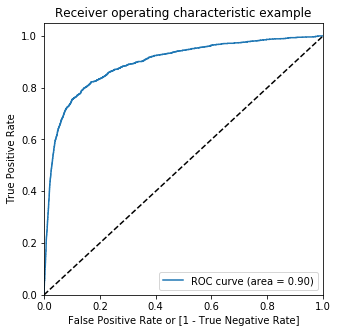

In [245]:
fpr, tpr, thresholds = roc_curve( y_train, pred_prob_1, drop_intermediate = False )
draw_roc(y_train, pred_prob_1)
%matplotlib inline


In [246]:
pred_1_test = model_1.predict(X_test)
print (accuracy_score(y_test, pred_1_test))


0.9286754002911208


In [247]:

import statsmodels.api as sm

In [248]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1 = logm1.fit()
logm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                20839
Model:                            GLM   Df Residuals:                    20759
Model Family:                Binomial   Df Model:                           79
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 30 Aug 2020   Deviance:                          inf
Time:                        10:26:04   Pearson chi2:                 1.35e+16
No. Iterations:                    40                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.9489      0.071    -55.937      0.000      -4.087      -3.811
arpu_6                 0.1353      0.092      1.476      0.140      -0.044       0.315
arpu_7                 0.2393      0.106      2.249      0.025       0.031       0.448
arpu_8                -0.2101      0.146     -1.438      0.150      -0.496       0.076
onnet_mou_6            2.0155      2.748      0.733      0.463      -3.371       7.402
onnet_mou_7            2.7227      2.078      1.310      0.190      -1.350       6.795
onnet_mou_8           -3.2553      1.875     -1.736      0.083      -6.931       0.420
offnet_mou_6           2.0189      2.822      0.715      0.474      -3.513       7.550
offnet_mou_7           2.9495      2.131      1.384      0.166      -1.228       7.127
offnet_mou_8          -3.6517      1.932     -1.890      0.059      -7.438       0.134
roam_ic_mou_6          0.0182      0.034      0.529      0.597      -0.049       0.086
roam_ic_mou_7          0.0536      0.035      1.533      0.125      -0.015       0.122
roam_ic_mou_8         -0.0415      0.034     -1.212      0.225      -0.108       0.026
roam_og_mou_6         -0.4532      0.695     -0.652      0.514      -1.816       0.909
roam_og_mou_7         -0.5002      0.425     -1.176      0.240      -1.334       0.334
roam_og_mou_8          0.8161      0.401      2.036      0.042       0.030       1.602
loc_og_mou_6          -1.5648      2.286     -0.685      0.494      -6.045       2.915
loc_og_mou_7          -2.4258      1.649     -1.471      0.141      -5.658       0.806
loc_og_mou_8           3.0488      1.495      2.039      0.041       0.118       5.980
std_og_mou_6          -2.5547      3.646     -0.701      0.484      -9.701       4.592
std_og_mou_7          -3.5815      2.786     -1.286      0.199      -9.041       1.878
std_og_mou_8           4.1237      2.520      1.636      0.102      -0.816       9.063
isd_og_mou_6          -0.0404      0.118     -0.343      0.731      -0.271       0.190
isd_og_mou_7          -0.0696      0.093     -0.749      0.454      -0.252       0.113
isd_og_mou_8           0.1036      0.091      1.134      0.257      -0.075       0.283
spl_og_mou_6          -0.0878      0.102     -0.865      0.387      -0.287       0.111
spl_og_mou_7          -0.0875      0.084     -1.040      0.298      -0.253       0.077
spl_og_mou_8           0.1272      0.082      1.544      0.123      -0.034       0.289
og_others_6            0.0756      0.028      2.689      0.007       0.020       0.131
og_others_7            3.9187      0.150     26.055      0.000       3.624       4.214
og_others_8           -5.1244      0.155    -33.166      0.000      -5.427      -4.822
loc_ic_mou_6           0.1417      0.063      2.245      0.025       0.018       0.265
loc_ic_mou_7           0.5694      0.0

### Feature Selection Using RFE

In [114]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()


from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [115]:
rfe.support_

array([False,  True, False, False, False,  True, False, False,  True,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False,  True, False, False,  True, False, False,  True,
       False, False, False,  True, False, False, False, False])

In [116]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))


[('arpu_6', False, 2),
 ('arpu_7', True, 1),
 ('arpu_8', False, 18),
 ('onnet_mou_6', False, 22),
 ('onnet_mou_7', False, 30),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 38),
 ('offnet_mou_7', False, 7),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 49),
 ('roam_ic_mou_7', False, 29),
 ('roam_ic_mou_8', False, 28),
 ('roam_og_mou_6', False, 39),
 ('roam_og_mou_7', False, 16),
 ('roam_og_mou_8', False, 4),
 ('loc_og_mou_6', False, 66),
 ('loc_og_mou_7', False, 6),
 ('loc_og_mou_8', True, 1),
 ('std_og_mou_6', False, 65),
 ('std_og_mou_7', False, 50),
 ('std_og_mou_8', False, 64),
 ('isd_og_mou_6', False, 42),
 ('isd_og_mou_7', False, 48),
 ('isd_og_mou_8', False, 41),
 ('spl_og_mou_6', False, 52),
 ('spl_og_mou_7', False, 51),
 ('spl_og_mou_8', False, 26),
 ('og_others_6', False, 60),
 ('og_others_7', False, 31),
 ('og_others_8', False, 32),
 ('loc_ic_mou_6', False, 5),
 ('loc_ic_mou_7', True, 1),
 ('loc_ic_mou_8', True, 1),
 ('std_ic_mou_6', False, 10),
 ('std_ic_mou_7

In [117]:
col = X_train.columns[rfe.support_]
col

Index(['arpu_7', 'onnet_mou_8', 'offnet_mou_8', 'loc_og_mou_8', 'loc_ic_mou_7',
       'loc_ic_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'vol_3g_mb_8', 'monthly_2g_8', 'sachet_2g_8',
       'monthly_3g_8', 'aon'],
      dtype='object')

In [118]:
X_train.columns[~rfe.support_]

Index(['arpu_6', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'offnet_mou_6',
       'offnet_mou_7', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_mou_6',
       'loc_og_mou_7', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
       'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6',
       'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7',
       'og_others_8', 'loc_ic_mou_6', 'std_ic_mou_6', 'std_ic_mou_7',
       'spl_ic_mou_6', 'spl_ic_mou_7', 'isd_ic_mou_6', 'isd_ic_mou_7',
       'isd_ic_mou_8', 'ic_others_6', 'ic_others_7', 'ic_others_8',
       'total_rech_num_6', 'total_rech_num_7', 'total_rech_amt_6',
       'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_6',
       'last_day_rch_amt_7', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8',
       'vol_3g_mb_6', 'vol_3g_mb_7', 'monthly_2g_6', 'monthly_2g_7',
       'sachet_2g_6

In [119]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                20839
Model:                            GLM   Df Residuals:                    20823
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4101.8
Date:                Sun, 30 Aug 2020   Deviance:                       8203.7
Time:                        10:17:02   Pearson chi2:                 1.02e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.2698      0.076    -56.205      0.000      -4.419      -4.121
arpu_7                 0.3541      0.031     11.387      0.000       0.293       0.415
onnet_mou_8           -0.3072      0.049     -6.263      0.000      -0.403      -0.211
offnet_mou_8          -0.2540      0.052     -4.916      0.000      -0.355      -0.153
loc_og_mou_8          -0.6404      0.114     -5.598      0.000      -0.865      -0.416
loc_ic_mou_7           0.6413      0.071      9.076      0.000       0.503       0.780
loc_ic_mou_8          -2.4532      0.166    -14.748      0.000      -2.779      -2.127
std_ic_mou_8          -0.3854      0.081     -4.759      0.000      -0.544      -0.227
spl_ic_mou_8          -0.6430      0.091     -7.057      0.000      -0.822      -0.464
total_rech_num_8      -0.5801      0.055    -10.473      0.000      -0.689      -0.472
last_day_rch_amt_8    -0.7575      0.062    -12.142      0.000      -0.880      -0.635
vol_3g_mb_8           -0.3703      0.098     -3.767      0.000      -0.563      -0.178
monthly_2g_8          -0.5083      0.071     -7.166      0.000      -0.647      -0.369
sachet_2g_8           -0.3691      0.066     -5.577      0.000      -0.499      -0.239
monthly_3g_8          -0.3293      0.093     -3.559      0.000      -0.511      -0.148
aon                   -0.2730      0.038     -7.231      0.000      -0.347      -0.199
======================================================================================
"""

In [120]:
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1,1)

print (y_train_pred.shape)
print (y_train.shape)

(20839, 1)
(20839, 1)


In [121]:
y_train_pred_final_1 = pd.DataFrame(y_train_pred)
y_train_pred_final_1.columns = ['y_train_pred']

y_train_pred_final_2 = pd.DataFrame(y_train)
y_train_pred_final_2.columns = ['y_train']

y_train_pred_final = pd.concat([y_train_pred_final_2,y_train_pred_final_1], axis = 1)
y_train_pred_final

,y_train,y_train_pred
0,0,0.275443
1,0,0.014903
2,0,0.155962
3,0,0.029747
4,0,0.000259
...,...,...
20834,1,0.427007
20835,0,0.000645
20836,0,0.000241
20837,0,0.024911


In [122]:
y_train_pred_final['predicted'] = y_train_pred_final.y_train_pred.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final

,y_train,y_train_pred,predicted
0,0,0.275443,0
1,0,0.014903,0
2,0,0.155962,0
3,0,0.029747,0
4,0,0.000259,0
...,...,...,...
20834,1,0.427007,0
20835,0,0.000645,0
20836,0,0.000241,0
20837,0,0.024911,0


In [123]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.y_train, y_train_pred_final.predicted )
print(confusion)

[[18821   217]
 [ 1399   402]]


In [124]:
print(metrics.accuracy_score(y_train_pred_final.y_train, y_train_pred_final.predicted))


0.9224530927587696


# VIF

In [125]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [126]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,loc_ic_mou_8,3.75
4,loc_ic_mou_7,3.46
10,vol_3g_mb_8,2.21
13,monthly_3g_8,2.14
3,loc_og_mou_8,1.66
2,offnet_mou_8,1.51
8,total_rech_num_8,1.50
0,arpu_7,1.46
1,onnet_mou_8,1.32
9,last_day_rch_amt_8,1.21


## Feature Importance

In [344]:
X_train_feature = X_train[X_train.columns[rfe.support_]]
X_train_feature.shape
X_train_feature.columns

Index(['arpu_7', 'onnet_mou_8', 'offnet_mou_8', 'loc_og_mou_8', 'loc_ic_mou_7',
       'loc_ic_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'vol_3g_mb_8', 'monthly_2g_8', 'sachet_2g_8',
       'monthly_3g_8', 'aon'],
      dtype='object')

In [331]:
X_train_feature

,arpu_7,onnet_mou_8,offnet_mou_8,loc_og_mou_8,loc_ic_mou_7,loc_ic_mou_8,std_ic_mou_8,spl_ic_mou_8,total_rech_num_8,last_day_rch_amt_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,aon
19535,-0.713432,-0.587936,-0.026354,-0.668578,-0.519681,-0.479763,-0.120695,-0.247549,-0.879366,-0.752974,-0.335843,-0.319655,-0.332088,-0.29987,-1.105241
9510,-0.908916,-0.023775,-0.376663,0.033330,-0.223211,-0.302120,-0.230982,-0.247549,-0.557427,1.255770,-0.335843,-0.319655,0.216235,-0.29987,0.751568
9849,0.430000,-0.408561,0.160108,-0.494419,-0.274107,-0.344119,0.347408,-0.247549,-0.450113,-0.752974,-0.335843,-0.319655,-0.332088,-0.29987,0.021558
8055,-0.521185,-0.504569,-0.188476,0.183144,0.160059,0.340133,-0.352705,-0.247549,-0.664740,-0.752974,-0.335843,-0.319655,-0.332088,-0.29987,0.526003
5816,-0.207858,-0.296095,-0.431206,0.139035,4.206897,3.236421,-0.381379,-0.247549,-0.557427,-0.351225,-0.335843,-0.319655,-0.332088,-0.29987,0.689025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,-1.537193,-0.601903,-0.821609,-0.746827,-0.796595,-0.774255,-0.381379,-0.247549,-0.986679,-0.752974,-0.335843,-0.319655,-0.332088,-0.29987,-1.108317
8006,-0.255875,-0.497483,-0.127362,0.129989,-0.207994,0.300123,-0.323459,-0.247549,3.520475,-0.511924,-0.335843,-0.319655,3.506171,-0.29987,-0.227589
17745,-0.604578,-0.038702,-0.087268,0.616452,-0.218258,0.869051,-0.214071,-0.247549,-0.772053,1.054895,-0.090626,2.487460,-0.332088,-0.29987,0.342475
17931,-0.201193,-0.465069,-0.073638,0.324142,-0.512817,-0.505884,-0.198141,-0.247549,-0.020861,0.404063,-0.335843,-0.319655,1.861203,-0.29987,-0.614125


In [332]:
lr_feature = LogisticRegression()
pred_feature = lr_feature.fit(X_train_feature, y_train)
lr_feature.predict(X_train_feature)

array([0, 0, 0, ..., 0, 0, 0])

In [336]:
importance = lr_feature.coef_[0]
importance

array([ 0.35408973, -0.30752333, -0.25554818, -0.6501707 ,  0.61991744,
       -2.37007161, -0.3859622 , -0.63211653, -0.58090372, -0.75544728,
       -0.36794865, -0.50282875, -0.36627191, -0.32674336, -0.27405612])

In [357]:
for i,v in zip(X_train_feature.columns,importance):
    #print('Feature: %0d, Score: %.5f' % (i,v))
    print (i,'\n',v )
    print ('\n')
    

arpu_7 
 0.354089733330768


onnet_mou_8 
 -0.307523326332829


offnet_mou_8 
 -0.25554818190715506


loc_og_mou_8 
 -0.6501707046120093


loc_ic_mou_7 
 0.6199174396493836


loc_ic_mou_8 
 -2.370071610778829


std_ic_mou_8 
 -0.3859621962116077


spl_ic_mou_8 
 -0.6321165265764519


total_rech_num_8 
 -0.580903724770615


last_day_rch_amt_8 
 -0.7554472819403407


vol_3g_mb_8 
 -0.3679486467931129


monthly_2g_8 
 -0.5028287472935777


sachet_2g_8 
 -0.36627191117510305


monthly_3g_8 
 -0.3267433622717505


aon 
 -0.2740561177625768




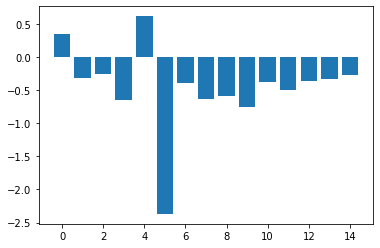

In [358]:

plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Finding Optimal Cutoff Point

In [127]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.y_train_pred.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,y_train,y_train_pred,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.275443,0,1,1,1,0,0,0,0,0,0,0
1,0,0.014903,0,1,0,0,0,0,0,0,0,0,0
2,0,0.155962,0,1,1,0,0,0,0,0,0,0,0
3,0,0.029747,0,1,0,0,0,0,0,0,0,0,0
4,0,0.000259,0,1,0,0,0,0,0,0,0,0,0


In [128]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix


# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.y_train, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.086424  1.000000  0.000000
0.1   0.1  0.813331  0.815658  0.813111
0.2   0.2  0.896588  0.720711  0.913226
0.3   0.3  0.922741  0.619100  0.951465
0.4   0.4  0.929123  0.463076  0.973211
0.5   0.5  0.922453  0.223209  0.988602
0.6   0.6  0.918134  0.088840  0.996586
0.7   0.7  0.915783  0.039978  0.998634
0.8   0.8  0.914823  0.019989  0.999475
0.9   0.9  0.914247  0.008329  0.999947


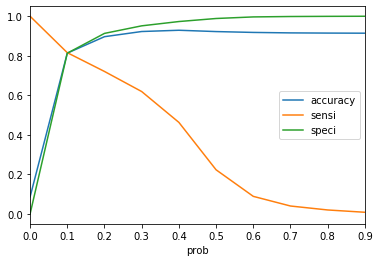

In [129]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [130]:
y_train_pred_final['final_predicted'] = y_train_pred_final.y_train_pred.map( lambda x: 1 if x > 0.1 else 0)
y_train_pred_final.head()

,y_train,y_train_pred,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.275443,0,1,1,1,0,0,0,0,0,0,0,1
1,0,0.014903,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.155962,0,1,1,0,0,0,0,0,0,0,0,1
3,0,0.029747,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.000259,0,1,0,0,0,0,0,0,0,0,0,0


In [131]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.y_train, y_train_pred_final.final_predicted)

0.813330774029464

# Test

In [132]:
X_test = X_test[col]
X_test.head()

,arpu_7,onnet_mou_8,offnet_mou_8,loc_og_mou_8,loc_ic_mou_7,loc_ic_mou_8,std_ic_mou_8,spl_ic_mou_8,total_rech_num_8,last_day_rch_amt_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,aon
7586,-0.376780,-0.560208,-0.738612,-0.586180,-0.697361,-0.686544,-0.381379,1.646698,-0.772053,-0.752974,1.707729,5.294575,-0.332088,-0.29987,-0.905309
3137,-0.908732,-0.478281,-0.597377,-0.299027,-0.432459,-0.291678,-0.366266,-0.247549,-0.879366,-0.752974,-0.335843,-0.319655,-0.332088,-0.29987,1.619992
28334,0.406680,1.785356,-0.248771,-0.510466,-0.667964,-0.379588,-0.326400,-0.247549,2.769282,-0.592274,-0.335843,-0.319655,-0.332088,-0.29987,0.007204
21910,-0.488263,0.105881,-0.098310,-0.336912,-0.675022,-0.542580,-0.045537,-0.247549,1.374211,-0.752974,-0.335843,-0.319655,-0.332088,-0.29987,-0.796627
16914,-0.402536,-0.230535,-0.743524,-0.707472,-0.789893,-0.757747,-0.301892,-0.247549,-0.772053,-0.190526,-0.335843,-0.319655,-0.332088,-0.29987,-0.104553


In [133]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)
y_test_pred = y_test_pred.values.reshape(-1,1)

In [134]:

y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.columns = ['y_test_pred']

y_test_df = pd.DataFrame(y_test)
y_test_df.columns = ['y_test']

y_pred_final = pd.concat([y_pred_1,y_test_df],axis = 1)

In [135]:
y_pred_final['final_predicted'] = y_pred_final.y_test_pred.map(lambda x: 1 if x > 0.1 else 0)
y_pred_final.head()

,y_test_pred,y_test,final_predicted
0,0.005598,0,0
1,0.098290,0,0
2,0.015549,0,0
3,0.065325,0,0
4,0.280323,0,1


In [136]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.y_test, y_pred_final.final_predicted)

0.8097637442615608

# High Performance Modelling with PCA

In [110]:
print ('X_train:',X_train.shape)
print ('y_train:',y_train.shape)
print ('X_test:' ,X_test.shape)
print ('y_test:',y_test.shape)

X_train: (20839, 80)
y_train: (20839, 1)
X_test: (8931, 80)
y_test: (8931, 1)


In [111]:
from sklearn.decomposition import PCA
pca = PCA(random_state=101)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=101,
    svd_solver='auto', tol=0.0, whiten=False)

#### Components of PCA

In [112]:
pca.components_

array([[ 2.41671482e-01,  2.71569563e-01,  2.60794879e-01, ...,
         1.34491477e-01,  1.26936147e-01,  2.94281625e-01],
       [-7.26898129e-02, -9.44427423e-02, -7.06725413e-02, ...,
         1.99348909e-01,  1.92521434e-01, -9.54272865e-02],
       [ 7.45140392e-03,  2.79649948e-02,  8.08872848e-03, ...,
         1.48508048e-01,  1.43056503e-01,  1.06101503e-02],
       ...,
       [ 8.32474783e-05,  2.43341443e-04, -1.11123067e-03, ...,
        -1.68268526e-05, -7.14415042e-05,  2.86235955e-04],
       [-4.97188267e-04,  3.81944680e-04,  1.92434287e-04, ...,
        -8.43458991e-06, -3.49440237e-06, -8.86899910e-05],
       [ 4.89887509e-16, -1.97250997e-16, -1.14962204e-16, ...,
         9.54502338e-18, -1.91840264e-17, -7.68857512e-01]])

In [113]:
pca.explained_variance_ratio_

array([1.08102537e-01, 8.60049579e-02, 5.75955169e-02, 5.09640594e-02,
       4.13318165e-02, 3.94276280e-02, 3.56885714e-02, 3.36886851e-02,
       3.00169756e-02, 2.93626170e-02, 2.72712682e-02, 2.68365383e-02,
       2.58473968e-02, 2.27539261e-02, 2.11648717e-02, 2.03447725e-02,
       1.62456092e-02, 1.60155915e-02, 1.54905367e-02, 1.50353756e-02,
       1.40539433e-02, 1.36437998e-02, 1.14175530e-02, 1.06298265e-02,
       1.02653762e-02, 1.00090808e-02, 9.46327874e-03, 9.18319348e-03,
       8.98042465e-03, 8.72557213e-03, 8.64675124e-03, 8.11172681e-03,
       7.70595644e-03, 7.61524337e-03, 7.43211254e-03, 6.51431395e-03,
       6.41870822e-03, 5.92184225e-03, 5.83137256e-03, 5.71494319e-03,
       5.67357082e-03, 5.46430269e-03, 5.06645203e-03, 4.93525687e-03,
       4.79195983e-03, 4.75374984e-03, 4.59173024e-03, 4.52752624e-03,
       4.17193245e-03, 4.01191851e-03, 3.91249636e-03, 3.85128933e-03,
       3.62943168e-03, 3.33914376e-03, 3.18466158e-03, 3.16216299e-03,
      

In [114]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.10810254, 0.1941075 , 0.25170301, 0.30266707, 0.34399889,
       0.38342652, 0.41911509, 0.45280377, 0.48282075, 0.51218337,
       0.53945463, 0.56629117, 0.59213857, 0.61489249, 0.63605737,
       0.65640214, 0.67264775, 0.68866334, 0.70415388, 0.71918925,
       0.7332432 , 0.74688699, 0.75830455, 0.76893437, 0.77919975,
       0.78920883, 0.79867211, 0.8078553 , 0.81683573, 0.8255613 ,
       0.83420805, 0.84231978, 0.85002573, 0.85764098, 0.86507309,
       0.8715874 , 0.87800611, 0.88392796, 0.88975933, 0.89547427,
       0.90114784, 0.90661214, 0.9116786 , 0.91661385, 0.92140581,
       0.92615956, 0.93075129, 0.93527882, 0.93945075, 0.94346267,
       0.94737517, 0.95122646, 0.95485589, 0.95819503, 0.96137969,
       0.96454186, 0.96759256, 0.9705812 , 0.97325599, 0.97582713,
       0.97825234, 0.98063458, 0.98297437, 0.9852458 , 0.98738853,
       0.9893596 , 0.99124273, 0.99261424, 0.99396762, 0.99524605,
       0.99648907, 0.99749767, 0.99843598, 0.99906824, 0.99964

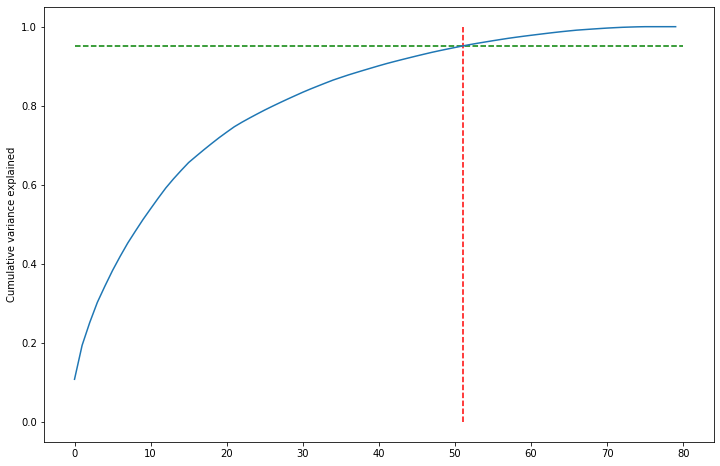

In [115]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=51, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=80, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

## Perform PCA with 51 components

In [116]:
from sklearn.decomposition import IncrementalPCA

pca_final = IncrementalPCA(n_components=51)
df_train_pca = pca_final.fit_transform(X_train)

In [117]:
df_train_pca.shape

(20839, 51)

In [118]:
corrmat = np.corrcoef(df_train_pca.transpose())
corrmat.shape

(51, 51)

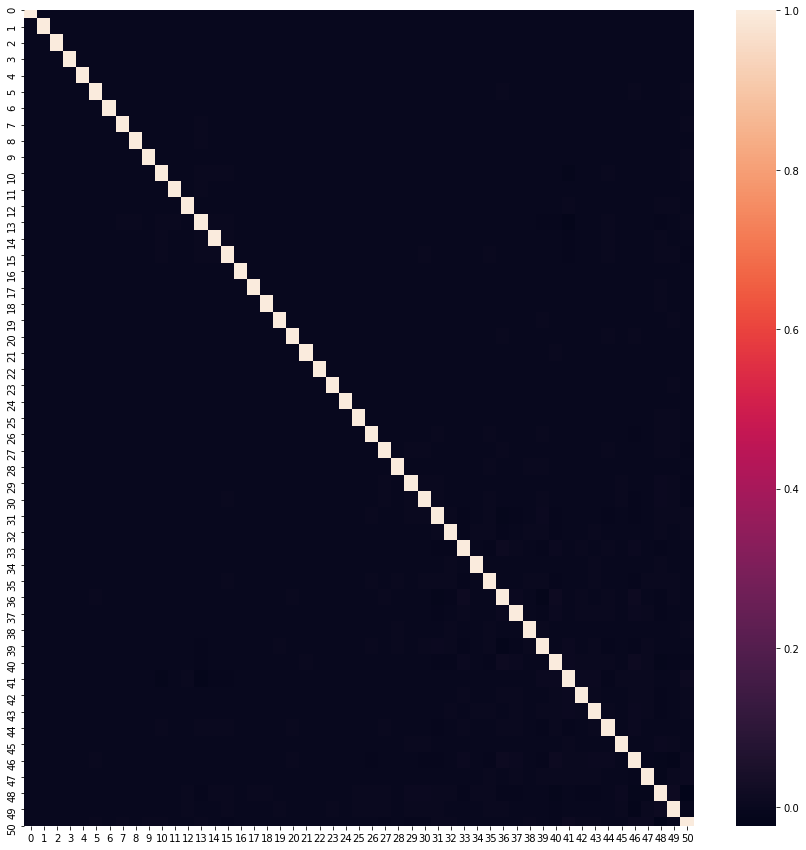

In [119]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=False)

In [120]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8931, 51)

In [121]:
X_train_pca = pd.DataFrame(df_train_pca)
X_test_pca = pd.DataFrame(df_test_pca)


In [122]:
X_train_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
0,-2.714540,0.005490,0.369759,-1.235367,-0.530423,0.747119,0.060905,-0.120221,-0.218784,-1.316192,0.097577,0.000563,-0.556683,-0.059116,0.042299,-0.388071,-0.158277,0.370260,1.982782,2.042907,0.595196,-0.896283,-0.459908,-0.539755,-0.059504,-0.426801,1.648828,2.494319,0.543368,-0.336312,-1.263674,-0.377655,0.211910,-0.411460,0.372823,-0.184113,-0.033336,-0.083446,-0.157138,0.031120,0.181686,-0.102575,-0.062710,0.060494,-0.209123,-0.089698,0.134374,-0.003698,-0.003561,0.079156,0.344626
1,-1.544224,-0.956049,0.762430,-0.187244,0.620706,-0.489940,-0.077169,-0.545480,-1.967017,1.049303,0.380966,1.254685,-0.588155,-0.053769,-1.543268,0.446133,0.066883,0.383930,-1.323173,0.578290,0.848107,0.461814,-1.163959,-0.977130,0.344446,-0.169178,0.446861,-0.591659,-1.196490,-0.335681,0.524651,-0.288570,0.755988,-0.610938,0.154407,-0.618638,0.135354,-0.191516,0.190215,0.444019,-0.309728,-0.100008,-0.003372,-0.046558,0.121170,-0.075026,0.725303,0.066566,-0.382385,0.327467,-0.093319
2,0.653604,1.842433,0.753196,-2.375097,-0.093699,-0.337449,0.123487,0.039045,0.482854,-1.947472,-0.011398,1.171082,-0.868591,-0.453507,0.154819,-0.101679,0.251113,0.437056,-0.843358,-0.675531,2.372416,-0.110645,0.113365,-0.384417,-0.112904,0.026516,-0.312781,0.133078,0.538797,0.451720,-0.146854,-0.964563,0.189617,-0.502403,0.532972,0.195981,0.377420,-0.325672,-0.443618,-0.021513,0.831630,-0.222481,0.062108,-0.461134,0.036914,-0.435252,0.183295,-0.002332,0.393213,-0.091527,0.046098
3,-1.670315,-1.390023,2.057265,-0.290795,-0.382873,0.169381,-0.239868,-0.400588,-0.624914,-0.086736,0.398892,0.403232,-0.594147,-0.214052,-0.219453,-0.355322,0.042620,0.621072,0.570343,0.620735,0.416257,0.287632,-0.049348,0.412796,0.078217,0.474603,0.890626,0.909227,1.118735,-0.680175,-0.052104,-0.314109,0.227608,0.044307,0.285488,-0.460786,-0.005663,-0.125385,-0.112910,0.186009,0.115460,-0.140179,-0.063639,0.097718,0.038577,0.184834,0.123935,0.032362,-0.023714,0.113481,0.265154
4,-0.312839,-1.762633,4.173134,3.799063,-0.457726,-1.597007,-0.657358,0.178209,0.175937,0.016518,-0.509586,-1.245789,1.810369,0.240752,0.949974,-1.059428,4.984504,0.975783,0.523564,1.231700,0.418468,-1.113290,-0.195756,0.089013,0.534706,-0.262169,0.439830,0.534583,0.349999,-0.058727,-0.137372,-0.313259,0.041851,-0.098945,0.226030,-0.433297,-0.061967,1.594052,-0.838194,0.292107,-0.277037,0.115789,0.062172,0.092427,-0.082611,-0.815731,-0.128416,0.382735,-0.793506,-0.434729,-0.409755


In [123]:
X_train_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
0,-2.714540,0.005490,0.369759,-1.235367,-0.530423,0.747119,0.060905,-0.120221,-0.218784,-1.316192,0.097577,0.000563,-0.556683,-0.059116,0.042299,-0.388071,-0.158277,0.370260,1.982782,2.042907,0.595196,-0.896283,-0.459908,-0.539755,-0.059504,-0.426801,1.648828,2.494319,0.543368,-0.336312,-1.263674,-0.377655,0.211910,-0.411460,0.372823,-0.184113,-0.033336,-0.083446,-0.157138,0.031120,0.181686,-0.102575,-0.062710,0.060494,-0.209123,-0.089698,0.134374,-0.003698,-0.003561,0.079156,0.344626
1,-1.544224,-0.956049,0.762430,-0.187244,0.620706,-0.489940,-0.077169,-0.545480,-1.967017,1.049303,0.380966,1.254685,-0.588155,-0.053769,-1.543268,0.446133,0.066883,0.383930,-1.323173,0.578290,0.848107,0.461814,-1.163959,-0.977130,0.344446,-0.169178,0.446861,-0.591659,-1.196490,-0.335681,0.524651,-0.288570,0.755988,-0.610938,0.154407,-0.618638,0.135354,-0.191516,0.190215,0.444019,-0.309728,-0.100008,-0.003372,-0.046558,0.121170,-0.075026,0.725303,0.066566,-0.382385,0.327467,-0.093319
2,0.653604,1.842433,0.753196,-2.375097,-0.093699,-0.337449,0.123487,0.039045,0.482854,-1.947472,-0.011398,1.171082,-0.868591,-0.453507,0.154819,-0.101679,0.251113,0.437056,-0.843358,-0.675531,2.372416,-0.110645,0.113365,-0.384417,-0.112904,0.026516,-0.312781,0.133078,0.538797,0.451720,-0.146854,-0.964563,0.189617,-0.502403,0.532972,0.195981,0.377420,-0.325672,-0.443618,-0.021513,0.831630,-0.222481,0.062108,-0.461134,0.036914,-0.435252,0.183295,-0.002332,0.393213,-0.091527,0.046098
3,-1.670315,-1.390023,2.057265,-0.290795,-0.382873,0.169381,-0.239868,-0.400588,-0.624914,-0.086736,0.398892,0.403232,-0.594147,-0.214052,-0.219453,-0.355322,0.042620,0.621072,0.570343,0.620735,0.416257,0.287632,-0.049348,0.412796,0.078217,0.474603,0.890626,0.909227,1.118735,-0.680175,-0.052104,-0.314109,0.227608,0.044307,0.285488,-0.460786,-0.005663,-0.125385,-0.112910,0.186009,0.115460,-0.140179,-0.063639,0.097718,0.038577,0.184834,0.123935,0.032362,-0.023714,0.113481,0.265154
4,-0.312839,-1.762633,4.173134,3.799063,-0.457726,-1.597007,-0.657358,0.178209,0.175937,0.016518,-0.509586,-1.245789,1.810369,0.240752,0.949974,-1.059428,4.984504,0.975783,0.523564,1.231700,0.418468,-1.113290,-0.195756,0.089013,0.534706,-0.262169,0.439830,0.534583,0.349999,-0.058727,-0.137372,-0.313259,0.041851,-0.098945,0.226030,-0.433297,-0.061967,1.594052,-0.838194,0.292107,-0.277037,0.115789,0.062172,0.092427,-0.082611,-0.815731,-0.128416,0.382735,-0.793506,-0.434729,-0.409755


# Modelling

In [124]:
print(X_train_pca.shape)
print (y_train.shape)
print (X_test_pca.shape)
print (y_test.shape)

(20839, 51)
(20839, 1)
(8931, 51)
(8931, 1)


## Logistic Regression

In [125]:
lr = LogisticRegression()
model_1 = lr.fit(X_train_pca, y_train)
y_pred_lr = model_1.predict(X_train_pca)
pred_prob = model_1.predict_proba(X_train_pca)

In [126]:
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score
print (accuracy_score(y_train, y_pred_lr))

0.9244685445558808


## Naive Bayes

In [377]:
from sklearn.naive_bayes import BernoulliNB
bnb=BernoulliNB()
model_4 = bnb.fit(X_train_pca, y_train)
pred_bnb = model_4.predict(X_train_pca)
pred_prob_bnb = bnb.predict_proba(X_train_pca)


In [378]:
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score
print (accuracy_score(y_train, pred_bnb))

0.8998992274101444


## Support Vector Machine

In [129]:
from sklearn.svm import SVC


svc = SVC()
model_2 = svc.fit(X_train_pca,y_train)
y_pred_svc = model_2.predict(X_train_pca)

In [130]:
from sklearn.metrics import accuracy_score
print("accuracy", accuracy_score(y_train, y_pred_svc))


accuracy 0.9377609290273046


## Random Forest

In [131]:
from sklearn.ensemble import RandomForestClassifier
rm = RandomForestClassifier()
model_3 = rm.fit(X_train_pca,y_train)
y_pred_rm = model_3.predict(X_train_pca)

In [132]:
from sklearn.metrics import accuracy_score
print("accuracy", accuracy_score(y_train, y_pred_rm))


accuracy 0.9911224147032007


###### Random Search for Random Forest - https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74


Using Scikit-Learn’s RandomizedSearchCV method, we can define a grid of hyperparameter ranges, and randomly sample from the grid, performing K-Fold CV with each combination of values.

from pprint import pprint

from sklearn.model_selection import RandomizedSearchCV

- Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 0, stop = 2000, num = 11)]

- Number of features to consider at every split
max_features = ['auto', 'sqrt']

- Maximum number of levels in tree
max_depth = [3,9,15]

- Minimum number of samples required to split a node
min_samples_split = [2, 8, 15]

- Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(0, 200, 21)]
min_samples_leaf = list(range(30,150,30))

- Method of selecting samples for training each tree
bootstrap = [True, False]

- Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)




rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = 3, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1)

rf_random.fit(X_train_pca,y_train)




Random search allowed us to narrow down the range for each hyperparameter. Now that we know where to concentrate our search, we can explicitly specify every combination of settings to try. We do this with GridSearchCV, a method that, instead of sampling randomly from a distribution, evaluates all combinations we define. 


### Tuning max_depth


In [146]:

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

n_folds = 5

parameters = {'max_depth': range(2, 20, 2)}

rf = RandomForestClassifier()

model_rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score = True)

model_rf.fit(X_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [147]:
scores = model_rf.cv_results_
print (model_rf.best_params_)
pd.DataFrame(scores).head()

{'max_depth': 12}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.257621,0.049696,0.005542,0.001101,2,{'max_depth': 2},0.913408,0.913628,0.913628,0.913607,0.913607,0.913576,0.000084,9,0.913617,0.913562,0.913562,0.913568,0.913568,0.913576,0.000021
1,0.365511,0.004882,0.005094,0.000248,4,{'max_depth': 4},0.913408,0.913628,0.913628,0.915047,0.913607,0.913863,0.000597,8,0.915117,0.913682,0.913562,0.915847,0.914048,0.914451,0.000887
2,0.680086,0.114573,0.007795,0.004368,6,{'max_depth': 6},0.913648,0.917466,0.914827,0.919126,0.915527,0.916119,0.001949,7,0.920396,0.921600,0.919021,0.921365,0.918606,0.920198,0.001207
3,0.885081,0.160324,0.006438,0.001134,8,{'max_depth': 8},0.916527,0.918186,0.919866,0.918407,0.918647,0.918326,0.001071,3,0.936773,0.937376,0.938156,0.936120,0.933241,0.936333,0.001686
4,0.812953,0.020548,0.006427,0.000365,10,{'max_depth': 10},0.915327,0.916987,0.917706,0.921526,0.919366,0.918182,0.002116,4,0.954889,0.954112,0.952012,0.953515,0.951595,0.953225,0.001246


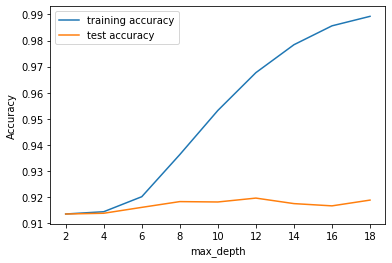

In [150]:
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


 ### n_estimators


In [189]:
    
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


n_folds = 5

parameters = {'n_estimators': [ 100, 150, 200, 250]}

rf = RandomForestClassifier()

model_rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score = True)

model_rf.fit(X_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [190]:
scores = model_rf.cv_results_
print (model_rf.best_params_)
pd.DataFrame(scores).head()

{'n_estimators': 150}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,15.497564,0.538458,0.088133,0.003311,100,{'n_estimators': 100},0.919165,0.919626,0.920345,0.925126,0.922246,0.921301,0.002182,4,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,25.297042,1.220414,0.154991,0.043232,150,{'n_estimators': 150},0.920844,0.920585,0.921065,0.924406,0.923446,0.922069,0.001553,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,31.003815,0.666599,0.173421,0.003593,200,{'n_estimators': 200},0.919645,0.919866,0.920825,0.924406,0.924166,0.921781,0.002084,3,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,41.685165,2.714529,0.347168,0.125548,250,{'n_estimators': 250},0.919165,0.920585,0.921065,0.926086,0.922966,0.921973,0.002389,2,1.0,1.0,1.0,1.0,1.0,1.0,0.0


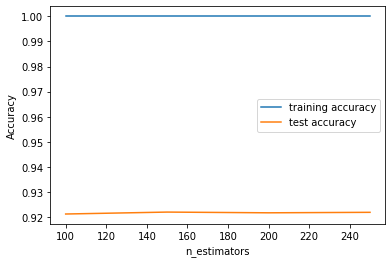

In [191]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


### Tuning max_features

In [153]:
    
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


n_folds = 5

parameters = {'max_features': [4, 8, 14, 20, 24]}

rf = RandomForestClassifier()


model_rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score = True)

model_rf.fit(X_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [154]:
scores = model_rf.cv_results_
print (model_rf.best_params_)
pd.DataFrame(scores).head()

{'max_features': 8}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.698682,0.049158,0.009449,0.001630,4,{'max_features': 4},0.912929,0.915307,0.916027,0.921286,0.918407,0.916791,0.002847,5,0.990822,0.990942,0.990882,0.990343,0.990883,0.990775,0.000219
1,1.476381,0.240768,0.009249,0.000748,8,{'max_features': 8},0.916527,0.917466,0.915547,0.922006,0.921766,0.918662,0.002702,1,0.991842,0.990882,0.990462,0.990463,0.991423,0.991014,0.000544
2,2.575126,0.127801,0.009250,0.001128,14,{'max_features': 14},0.915807,0.916507,0.915307,0.920566,0.919606,0.917558,0.002120,4,0.990882,0.991002,0.990402,0.990763,0.990163,0.990643,0.000313
3,4.011104,0.463604,0.009469,0.000628,20,{'max_features': 20},0.916287,0.919866,0.915547,0.918886,0.920326,0.918182,0.001922,3,0.990702,0.990223,0.990642,0.992382,0.991243,0.991038,0.000746
4,5.950160,0.362551,0.011636,0.003329,24,{'max_features': 24},0.917726,0.914587,0.918666,0.921526,0.919366,0.918374,0.002270,2,0.991422,0.991122,0.991242,0.991663,0.990163,0.991122,0.000513


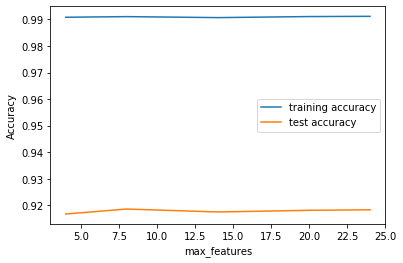

In [155]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


### Tuning min_samples_leaf

In [173]:
    
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


n_folds = 5

parameters = {'min_samples_leaf': range(1, 100, 20)}

rf = RandomForestClassifier()


model_rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score = True)

model_rf.fit(X_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [174]:
scores = model_rf.cv_results_
print (model_rf.best_params_)
pd.DataFrame(scores).head()

{'min_samples_leaf': 21}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.585996,0.334698,0.010639,0.001963,1,{'min_samples_leaf': 1},0.916767,0.919146,0.920825,0.915287,0.917687,0.917942,0.001911,2,0.989502,0.990343,0.991422,0.990523,0.990463,0.990451,0.000610
1,1.006329,0.036439,0.008333,0.001127,21,{'min_samples_leaf': 21},0.917966,0.921065,0.915787,0.920326,0.919126,0.918854,0.001862,1,0.930714,0.929758,0.929098,0.927363,0.928683,0.929123,0.001116
2,0.916682,0.015492,0.008518,0.001061,41,{'min_samples_leaf': 41},0.915567,0.917706,0.915067,0.919846,0.917687,0.917175,0.001715,3,0.922675,0.921600,0.922200,0.919506,0.919446,0.921086,0.001358
3,0.890463,0.042392,0.008086,0.001016,61,{'min_samples_leaf': 61},0.914848,0.918666,0.914347,0.918886,0.916007,0.916551,0.001896,4,0.921356,0.919561,0.916742,0.918366,0.917406,0.918686,0.001638
4,0.906540,0.070532,0.008330,0.000383,81,{'min_samples_leaf': 81},0.913888,0.913868,0.915067,0.915287,0.914327,0.914487,0.000591,5,0.914637,0.914822,0.917102,0.914767,0.915427,0.915351,0.000917


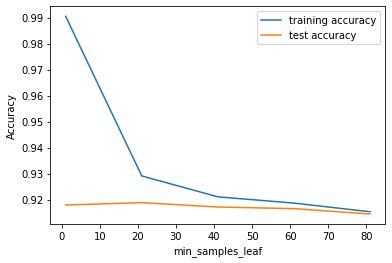

In [175]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning min_samples_split

In [176]:
    
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


n_folds = 5

parameters = {'min_samples_split': range(200, 500, 50)}

rf = RandomForestClassifier()


model_rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score = True)

model_rf.fit(X_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [178]:
scores = model_rf.cv_results_
print (model_rf.best_params_)
pd.DataFrame(scores).head()

{'min_samples_split': 250}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.444952,0.360453,0.010172,0.003097,200,{'min_samples_split': 200},0.914848,0.913868,0.913868,0.915047,0.915287,0.914583,0.000601,2,0.919196,0.917341,0.918241,0.914947,0.916927,0.917331,0.001425
1,1.447026,0.228745,0.010587,0.002633,250,{'min_samples_split': 250},0.913888,0.915067,0.917226,0.914807,0.915287,0.915255,0.001095,1,0.917037,0.916022,0.919261,0.915127,0.916627,0.916815,0.001382
2,1.351621,0.089215,0.011043,0.004320,300,{'min_samples_split': 300},0.913408,0.914107,0.915547,0.914567,0.914567,0.914439,0.000698,3,0.915477,0.914762,0.916382,0.914167,0.915667,0.915291,0.000763
3,1.518456,0.324283,0.009638,0.001495,350,{'min_samples_split': 350},0.913169,0.913868,0.913868,0.913607,0.914327,0.913767,0.000379,6,0.917516,0.913802,0.914522,0.913568,0.914467,0.914775,0.001420
4,1.911535,0.215673,0.010846,0.002034,400,{'min_samples_split': 400},0.914128,0.913868,0.913388,0.915047,0.913847,0.914055,0.000550,4,0.914577,0.913742,0.914102,0.914587,0.915787,0.914559,0.000691


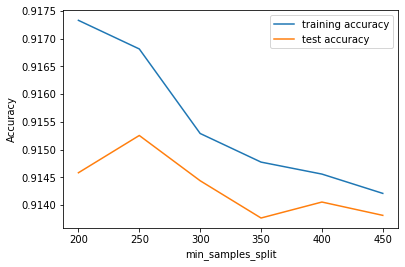

In [179]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [192]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [10,12,14],
    'min_samples_leaf': [15,20,25,30],
    'min_samples_split': [200,250,300],
    'n_estimators': [100,150,200,250], 
    'max_features': [6, 8, 10]
}


rf = RandomForestClassifier()
model_rf = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

model_rf.fit(X_train_pca, y_train)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 26.4min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 169.5min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 392.2min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 482.1min
[Parallel(n_jobs=-1)]: Done 1296 out of 1296 | elapsed: 489.9min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [230]:
y_pred_rf = model_rf.predict(X_test_pca)

In [231]:
from sklearn.metrics import accuracy_score
print("accuracy", accuracy_score(y_test, y_pred_rf))

accuracy 0.9174784458627253


## XGBoost

In [197]:
import xgboost as xgb
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
model_5 = xgb_model.fit(X_train_pca,y_train)
y_pred_xgb = model_5.predict(X_train_pca)

In [198]:
from sklearn.metrics import accuracy_score
print("accuracy", accuracy_score(y_train, y_pred_xgb))
0.9986083785210422

accuracy 0.9986083785210422


In [199]:
# hyperparameter tuning with XGBoost

folds = 3

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


xgb_model = XGBClassifier(max_depth=12, n_estimators=150)

model_xgb_1 = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

model_6 = model_xgb_1.fit(X_train_pca,y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  3.5min finished


In [204]:
cv_results = pd.DataFrame(model_6.cv_results_)
print (model_6.best_params_)
cv_results

{'learning_rate': 0.2, 'subsample': 0.9}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,8.441330,1.367412,0.085170,0.017142,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.918958,0.921250,0.920098,0.920102,0.000936,5,1.000000,0.999784,0.999568,0.999784,0.000176
1,14.122777,0.959179,0.058889,0.001140,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.919965,0.923841,0.925713,0.923173,0.002393,2,1.000000,1.000000,1.000000,1.000000,0.000000
2,14.543171,0.222362,0.057191,0.002885,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.923132,0.924993,0.925137,0.924421,0.000913,1,1.000000,1.000000,1.000000,1.000000,0.000000
3,8.090023,0.754600,0.056875,0.007229,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.907010,0.909588,0.907141,0.907913,0.001186,6,0.999928,1.000000,0.999928,0.999952,0.000034
4,9.929622,0.543861,0.063005,0.020267,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.920973,0.919954,0.921250,0.920726,0.000557,4,1.000000,1.000000,1.000000,1.000000,0.000000
5,12.913756,0.769954,0.047636,0.004195,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.918526,0.924993,0.924417,0.922645,0.002922,3,1.000000,1.000000,1.000000,1.000000,0.000000


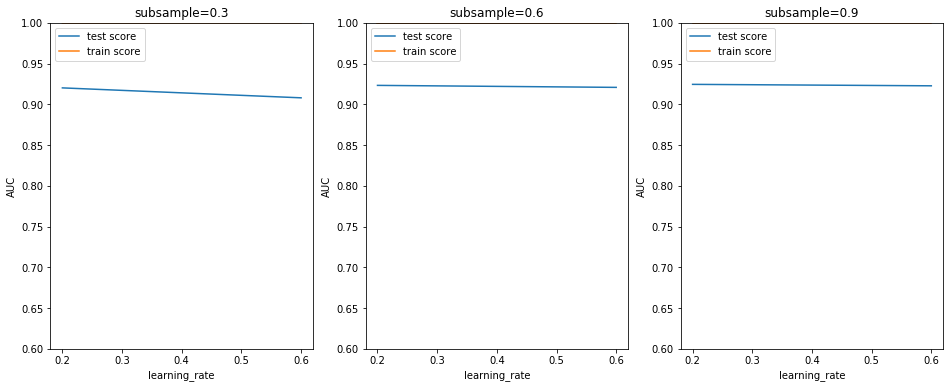

In [209]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    #plt.xscale('log')

In [211]:


# chosen hyperparameters
params = {'learning_rate': 0.2,
          'max_depth': 12, 
          'n_estimators':150,
          'subsample':0.9}

# fit model on training data
model_fi = XGBClassifier(params = params)
model_fi.fit(X_train_pca, y_train)

[09:39:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic',
              params={'learning_rate': 0.2, 'max_depth': 12,
                      'n_estimators': 150, 'subsample': 0.9},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [370]:
y_pred = model_fi.predict(X_train_pca)

In [371]:
from sklearn.metrics import accuracy_score
print("accuracy", accuracy_score(y_train, y_pred))

accuracy 0.9986083785210422


In [375]:
# predict
y_pred = model_fi.predict(X_test_pca)

In [376]:
from sklearn.metrics import accuracy_score
print("accuracy", accuracy_score(y_test, y_pred))

accuracy 0.9246444966968984


# CASE STUDY

•	We performed the PCA with 51 Features

•	Based on RFE Below are Top 15 Features


arpu_7

onnet_mou_8

offnet_mou_8

loc_og_mou_8

loc_ic_mou_7

loc_ic_mou_8

std_ic_mou_8

spl_ic_mou_8


total_rech_num_8

last_day_rch_amt_8

vol_3g_mb_8

monthly_2g_8

sachet_2g_8

monthly_3g_8

Aon



# Feature Description:

1.	General Feature
a.	aon - Age on network - number of days the customer is using the operator T network

2.	7th Month Features
a.	arpu_7 - Average revenue per user

b.	loc_ic_mou_7 - Local Incoming Minutes of Usage

3.	8th Month Features

a.	onnet_mou_8 - Minutes of Usage of All kind of calls within the same operator network

b.	spl_ic_mou_8 - Special Incoming Minutes of Usage

c.	offnet_mou_8 - Minutes of Usage of All kind of calls outside the operator network

d.	loc_ic_mou_8 - Local incoming Minutes of Usage

e.	std_ic_mou_8 - STD incoming Minutes of Usage

f.	total_rech_num_8 - Total number of recharges

g.	last_day_rch_amt_8 - Last day recharge amount

h.	vol_3g_mb_8 - Total MB of 3G Data Consumed

i.	loc_og_mou_8 - Local outgoing Minutes of Usage

j.	monthly_2g_8 - 2G network Service schemes with validity equivalent to a month

k.	monthly_3g_8 - 3G network Service schemes with validity equivalent to a month

l.	sachet_2g_8 - 2G network Service schemes with validity smaller than a month


# Model Discovery:
The following can be considered to improve the proposed customer loyalty assessment/Churn model and actionable knowledge discovery system.

1.	The proposed models can be further be enhanced, if the processes can be done parallelly . This is feasible, by identifying operations that are independent to each other and propose a parallel architecture to improve the performance. 

2.	Amount of memory used loyalty assessment and action discovery is another area which can be analyzed in future. 

3.	Classification process can be improved by using ensemble techniques like Random Forest, Boosting.


# Major Impacts/Influences:

1.	Age on Network plays a vital role in determining the churn of a customer. An older customer doesn’t churn quickly due to loyalty towards network and the comfort and convenience.

2.	7th Month is the end of good phase. Customer is in Action phase. There is a decrease in the local incoming minutes and revenue from the user.

3.	8th Month is the Churn Phase.

a.	 Here all the signs predict that the customer is on the verge of leaving the network. 

b.	The is a steep decrease in Minutes of Usage for Local, STD and Special Incoming calls from same and different network providers. 

c.	There is decline in total number of recharges and last day recharge amount.

d.	In reference to outgoing calls, the local outgoing calls which were frequently used are decreasing.

e.	There is absolutely no 3G data usage.



# Predictions / Recommendations:
As per the above analysis we are predicting:

1.	As the customers age’s on network they are less likely to leave the network due to loyalty and service

2.	Most likely if we get to know that there is a decrease in incoming calls and revenue from user i.e. 7th Month/Action phase, we will have to offer them some lucrative plans and perks. Also getting in contact with them and trying to resolve the issues they are facing.
